# EDA & HEART DISEASE PREDICTION

__PROBLEM__

Menurut CDC, penyakit jantung adalah penyebab utama kematian bagi sebagian besar ras di Amerika Serikat (Amerika-Afrika, Penduduk Asli Amerika, dan orang kulit putih). Sekitar setengah dari seluruh warga Amerika (47%) memiliki setidaknya 1 dari 3 faktor risiko utama untuk penyakit jantung, tekanan darah tinggi, kolesterol tinggi, dan merokok. Indikator-indikator lainnya meliputi status diabetes, obesitas (BMI tinggi), kurangnya aktivitas fisik, atau mengonsumsi alkohol secara berlebihan. Mengidentifikasi dan mencegah faktor-faktor yang memiliki dampak terbesar pada penyakit jantung sangat penting dalam perawatan kesehatan. 

__OBJECTIVE__
1. Identifikasi Faktor Risiko
2. Kesadaran Kesehatan
3. Prediksi Penyakit Jantung

__ABOUT DATASET__

1. HeartDisease: Kolom ini berisi informasi apakah seseorang memiliki penyakit jantung atau tidak.

2. BMI: Singkatan dari Body Mass Index, yang mengukur proporsi berat badan terhadap tinggi badan seseorang.

3. Smoking: Kolom ini mungkin menyimpan informasi apakah seseorang merokok atau tidak.

4. AlcoholDrinking: Informasi tentang apakah seseorang mengonsumsi minuman beralkohol atau tidak.

5. Stroke: Dapat berisi informasi apakah seseorang pernah mengalami stroke atau tidak.

6. PhysicalHealth: Kolom ini mungkin menjelaskan kondisi kesehatan fisik seseorang.

7. MentalHealth: Menunjukkan kondisi kesehatan mental seseorang.

8. DiffWalking: Kemungkinan menyimpan informasi apakah seseorang mengalami kesulitan berjalan atau tidak.

9. Sex: Menunjukkan jenis kelamin seseorang.

10. AgeCategory: Mengelompokkan usia seseorang ke dalam kategori-kategori tertentu.

11. Race: Menyimpan informasi tentang ras atau etnisitas seseorang.

12. Diabetic: Informasi tentang apakah seseorang memiliki diabetes atau tidak.

13. PhysicalActivity: Menunjukkan seberapa aktif seseorang dalam aktivitas fisik.

14. GenHealth: Menggambarkan kondisi kesehatan secara keseluruhan seseorang.

15. SleepTime: Waktu tidur seseorang, yang bisa menjadi indikator kesehatan tidur.

16. Asthma: Informasi tentang apakah seseorang memiliki asma atau tidak.

17. KidneyDisease: Dapat berisi informasi apakah seseorang memiliki penyakit ginjal atau tidak.

18. SkinCancer: Informasi tentang apakah seseorang memiliki kanker kulit atau tidak.

In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('heartdiase.csv')
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

# DATA CLEANSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## CEK MISSING VALUE

In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

0 missing value, BAGUS!

In [6]:
# Menghitung jumlah nilai yang 0 pada kolom BMI
count_zero_bmi = (df['BMI'] == 0.0).sum()
print(f'Jumlah nilai yang 0 pada kolom BMI: {count_zero_bmi}')

Jumlah nilai yang 0 pada kolom BMI: 0


## CEK DUPLICATE DATA

In [5]:
df.duplicated().sum()

18078

Wow, banyak data duplikat.. mari drop!

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

Mantap! 0 duplikat

# EXPLORATORY DATA ANALYSIS (EDA)

__1. Berapa nilai frekuensi dari setiap kolom?__

In [8]:
def make_pie(column):
    # Menghitung jumlah nilai unik dalam kolom yang diberikan dan menyimpannya dalam bentuk Series
    values = df[column].value_counts()
    
    # Membuat diagram pie menggunakan nilai-nilai yang dihitung
    # values.values: nilai frekuensi dari setiap kategori
    # labels=values.index: label untuk setiap segmen pie berdasarkan kategori
    # autopct='%1.1f%%': menampilkan persentase masing-masing segmen pie dengan format 1.1%
    # startangle=90: memulai sudut pie dari 90 derajat (tengah atas)
    # shadow=True: menambahkan bayangan pada diagram pie
    # rotatelabels=True: memutar label agar sesuai dengan orientasi segmen pie
    plt.pie(values.values, labels=values.index, autopct='%1.1f%%', startangle=90, shadow=True, rotatelabels=True)


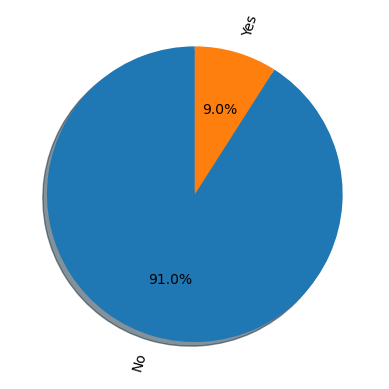

In [9]:
make_pie('HeartDisease')

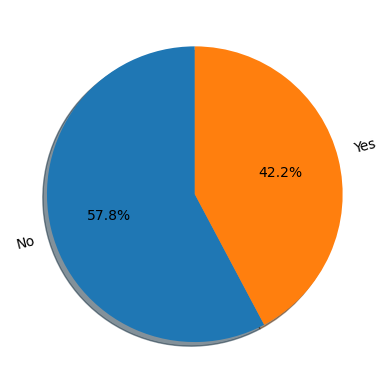

In [10]:
make_pie('Smoking')

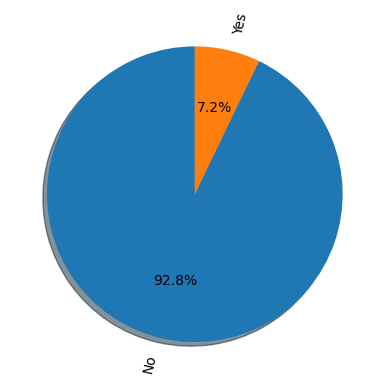

In [11]:
make_pie('AlcoholDrinking')

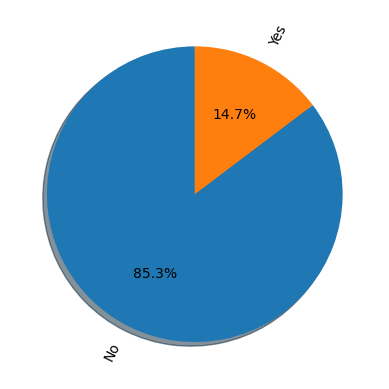

In [12]:
make_pie('DiffWalking')

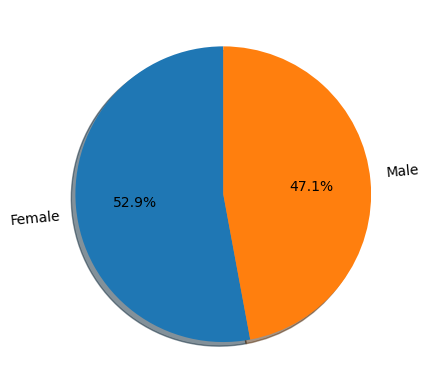

In [13]:
make_pie('Sex')

Dari pie chart yang berada diatas dapat dilihat bahwa :
1. Pada kolom Heartdiase bervalue "NO" berjumlah 91% dan "YES" berjumlah 9%
2. Pada kolom Smoking bervalue "NO" berjumlah 57,8% dan "YES" berjumlah 42,8%
3. Pada kolom AlcoholDrinking bervalue "NO" berjumlah 92,8% dan "YES" berjumlah 7,2%
4. Pada kolom DiffWalking bervalue "NO" berjumlah 85,3% dan "YES" berjumlah 14,7%
5. Pada kolom Sex bervalue "Famale" berjumlah 52,9% dan "Male" berjumlah 47,1%

__2. Bagaimana distribusi umur dengan heart disease?__

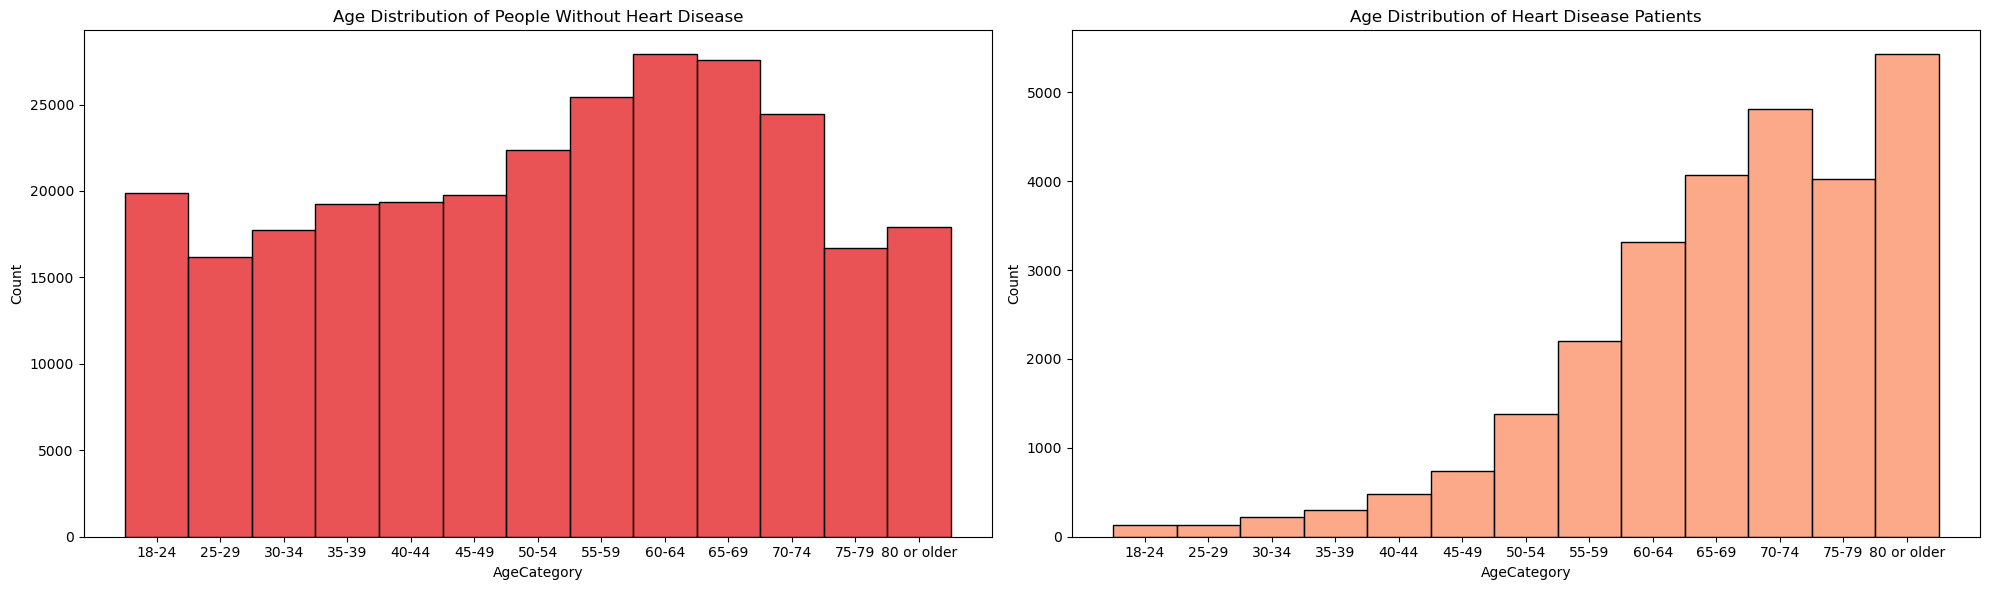

In [22]:
# Mendefinisikan warna untuk plot menggunakan palet Set1 dan Set2 dari seaborn
colors1 = sns.color_palette("Set1")[0]  # Warna pertama dari palet Set1
colors2 = sns.color_palette("Set2")  # Semua warna dari palet Set2

# Membuat figure dengan dua subplot di sebelah satu sama lain (dua kolom) dan mengatur ukuran figure menjadi 20x6 inci
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

# Membuat histogram pada subplot pertama (ax1)
sns.histplot(
    data=df.loc[df.HeartDisease == 'No'].sort_values("AgeCategory"),  # Data orang tanpa penyakit jantung, diurutkan berdasarkan kategori usia
    x='AgeCategory',  # Kategori usia sebagai sumbu x
    color=colors1,  # Warna histogram menggunakan warna pertama dari Set1
    ax=ax1  # Menggunakan subplot pertama
)
# Menambahkan judul untuk subplot pertama
ax1.set_title("Age Distribution of People Without Heart Disease")

# Membuat histogram pada subplot kedua (ax2)
sns.histplot(
    data=df.loc[df.HeartDisease == 'Yes'].sort_values("AgeCategory"),  # Data pasien dengan penyakit jantung, diurutkan berdasarkan kategori usia
    x='AgeCategory',  # Kategori usia sebagai sumbu x
    color=colors2[1],  # Warna histogram menggunakan warna kedua dari Set2
    ax=ax2  # Menggunakan subplot kedua
)
# Menambahkan judul untuk subplot kedua
ax2.set_title("Age Distribution of Heart Disease Patients")

# Menambahkan ruang ekstra antara subplot untuk tata letak yang lebih rapi
fig.tight_layout()

# Menampilkan plot
plt.show()


Dapat dilihat dari distribusi bahwa orang yang tidak memiliki heart disease memiliki jumlah yang beragam di setiap age category, tetapi orang yang memiliki umur semakin tua memiliki tingkat heart disease yang tinggi

__3. Bagaimana hubungan distribusi umur dengan physical activity berdasarkan heart disease?__

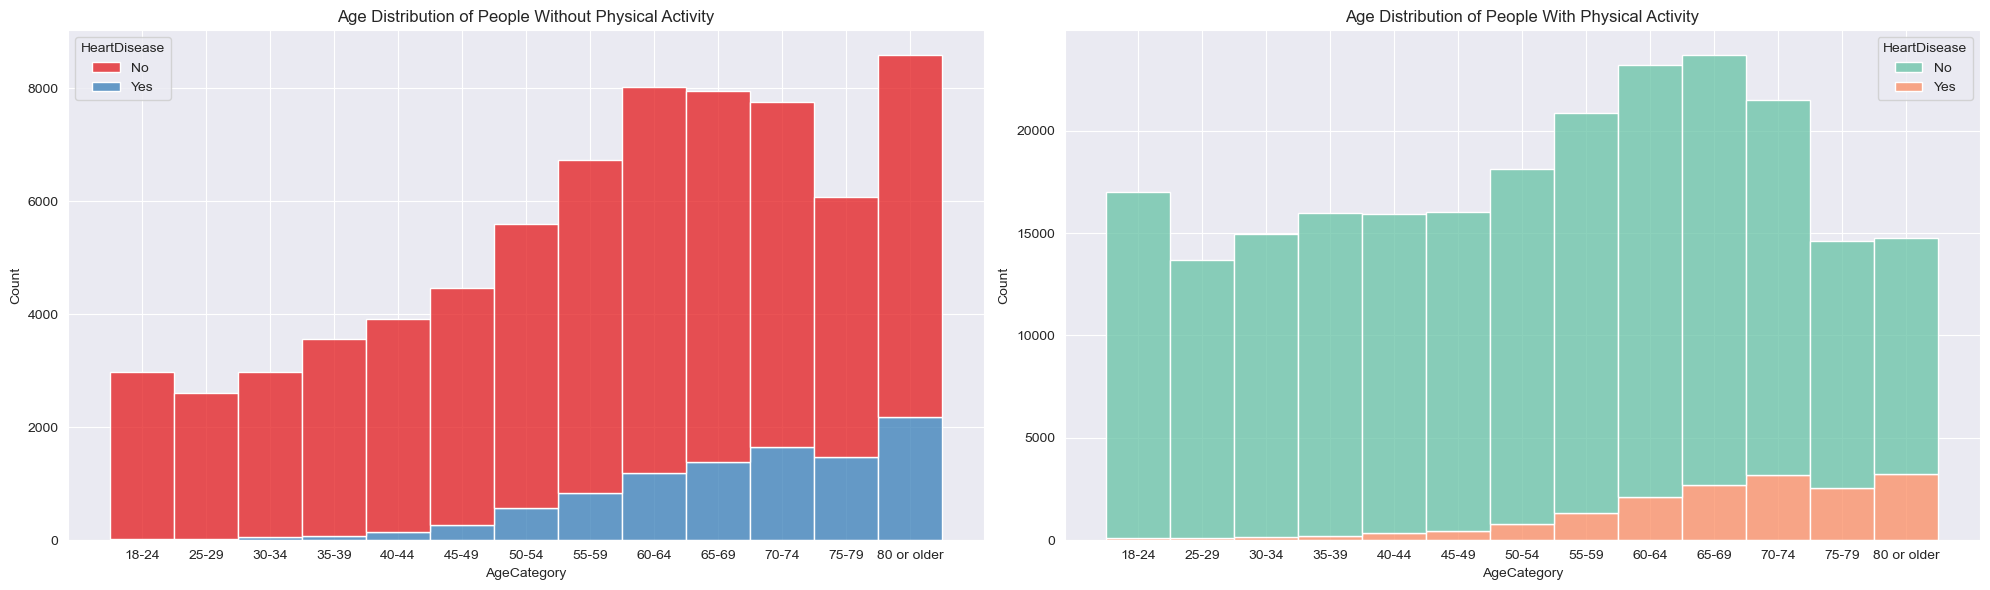

In [15]:
# Definisikan warna untuk plot menggunakan palet Set1 dan Set2 dari seaborn
colors1 = sns.color_palette("Set1")[0]  # Warna pertama dari palet Set1
colors2 = sns.color_palette("Set2")  # Semua warna dari palet Set2

# Membuat figure dengan dua subplot di sebelah satu sama lain (dua kolom) dan mengatur ukuran figure menjadi 20x6 inci
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

# Membuat histogram pada subplot pertama (ax1)
sns.histplot(
    data=df.loc[df.PhysicalActivity == 'No'].sort_values("AgeCategory"),  # Data orang tanpa physical activity, diurutkan berdasarkan kategori usia
    x='AgeCategory',  # Kategori usia sebagai sumbu x
    hue='HeartDisease',  # Menambahkan hue berdasarkan HeartDisease
    multiple='stack',  # Menumpuk histogram berdasarkan kategori hue
    palette='Set1',  # Menggunakan palet warna Set1
    ax=ax1  # Menggunakan subplot pertama
)
# Menambahkan judul untuk subplot pertama
ax1.set_title("Age Distribution of People Without Physical Activity")

# Membuat histogram pada subplot kedua (ax2)
sns.histplot(
    data=df.loc[df.PhysicalActivity == 'Yes'].sort_values("AgeCategory"),  # Data pasien dengan PhysicalActivity, diurutkan berdasarkan kategori usia
    x='AgeCategory',  # Kategori usia sebagai sumbu x
    hue='HeartDisease',  # Menambahkan hue berdasarkan HeartDisease
    multiple='stack',  # Menumpuk histogram berdasarkan kategori hue
    palette='Set2',  # Menggunakan palet warna Set2
    ax=ax2  # Menggunakan subplot kedua
)
# Menambahkan judul untuk subplot kedua
ax2.set_title("Age Distribution of People With Physical Activity")

# Menambahkan ruang ekstra antara subplot untuk tata letak yang lebih rapi
fig.tight_layout()

# Menampilkan plot
plt.show()

Terlihat bahwaw orang yang tidak memiliki physical activity memiliki penyakit jantung yang lebih tinggi dibandingkan yang memiliki physical activity, dimana dapat dapat dikatakan jika jika tidak memiliki physical activity semakin tua cenderung akan memiliki resiko heart disease.

__4. Bagaimana pengaruh kesehatan keseluruhan terhadap heart disease & smoking?__

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan palet warna
colors1 = sns.color_palette("pastel")
colors2 = sns.color_palette("muted")
colors6 = sns.color_palette("bright")

def show_relation(col, according_to, type_='dis'):
    """
    Visualize relationships between variables using Seaborn.
    
    Parameters:
    col (str): The column to be plotted.
    according_to (str or None): The column to be used for grouping or hue (coloring). Can be None.
    type_ (str): Type of visualization, 'dis' for distribution or 'count' for count/percentage.
    
    Returns:
    None
    """
    
    # #Mengatur ukuran gambar plot menjadi 15x7 inci
    plt.figure(figsize=(15, 7))
    
    # #Jika tipe adalah 'dis' (distribusi), gunakan sns.displot untuk membuat plot distribusi dengan KDE
    if type_ == 'dis':
        sns.displot(data=df, x=col, hue=according_to, kind='kde', palette=colors2)
    # #Jika tipe adalah 'count' (jumlah/persentase)
    elif type_ == 'count':
        if according_to is not None:
            # #Menghitung persentase dengan groupby dan value_counts, kemudian reset index
            perc = df.groupby(col)[according_to].value_counts(normalize=True).reset_index(name='Percentage')
            # #Membuat barplot dengan persentase
            sns.barplot(data=perc, x=col, y='Percentage', hue=according_to, palette=colors6,
                        order=df[col].value_counts().index)
        else:
            # #Jika according_to bernilai None, membuat countplot
            sns.countplot(data=df, x=col, hue=according_to, palette=colors1, order=df[col].value_counts().index)
    
    # #Mengatur judul plot berdasarkan parameter col dan according_to
    if according_to is None:
        plt.title(f'{col}')
    else:
        plt.title(f'{col} according to {according_to}')
    
    # #Tampilkan plot
    plt.show()


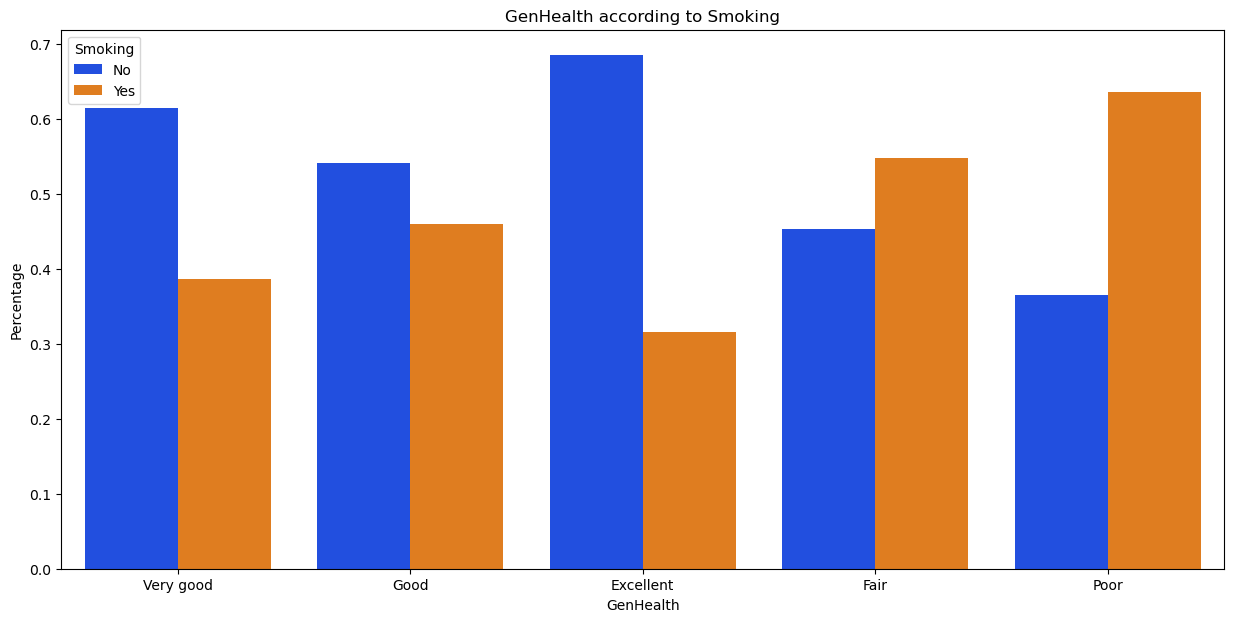

In [11]:
show_relation('GenHealth', 'Smoking', 'count')

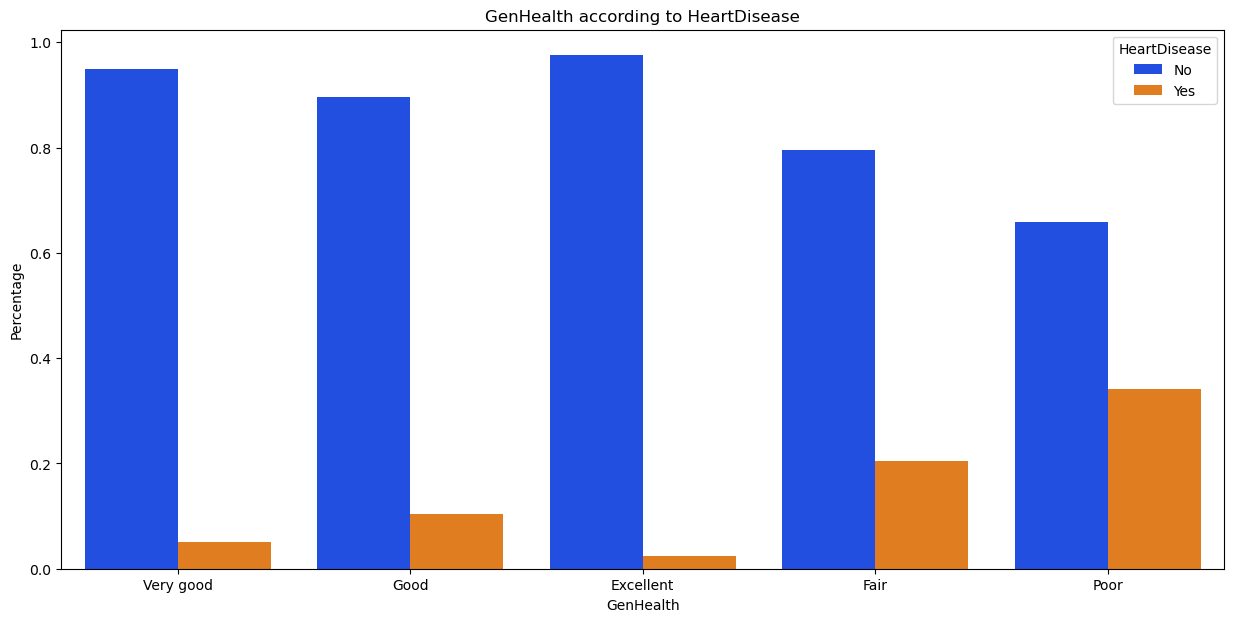

In [13]:
show_relation('GenHealth', 'HeartDisease', 'count')

Dapat terlihat kesehatan keseluruhan sangat berpengaruh terhadap smoking dan heart disease, dimana jika kesehataan sangat buruk cenderung terkena heart disease dan merokok membuat kesehatan memburuk.

__5. Bagaimana tingkatan penyakit jantung berdasarkan ras?__

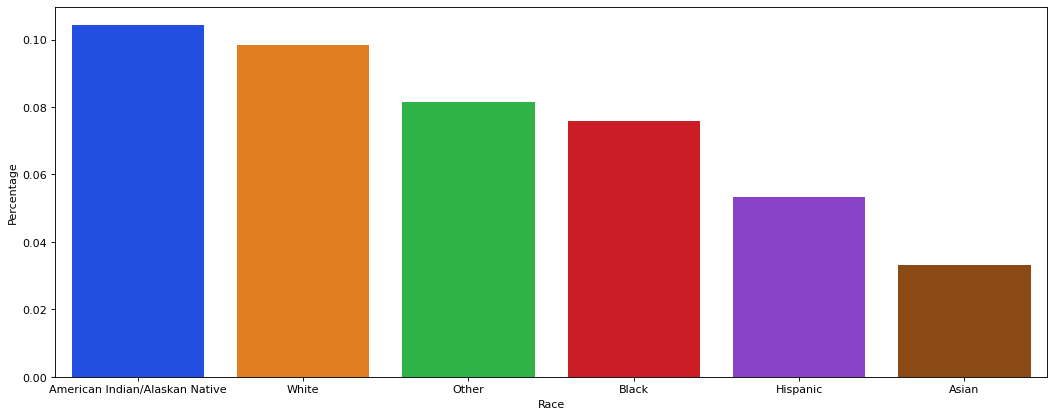

In [23]:
# Mendefinisikan palet warna "bright" dari seaborn
bright = sns.color_palette("bright")

# Membuat figure dengan ukuran 16x6 inci dan resolusi 80 dpi
plt.figure(figsize=(16, 6), dpi=80)

# Mengelompokkan data berdasarkan 'Race' dan menghitung proporsi (persentase) nilai 'HeartDisease'
x = df.groupby('Race').HeartDisease.value_counts(normalize=True).reset_index(name='Percentage')

# Memilih hanya baris yang memiliki nilai 'HeartDisease' sama dengan 'Yes' dan mengurutkannya berdasarkan 'Percentage' secara menurun
x = x.loc[x.HeartDisease == 'Yes'].sort_values('Percentage', ascending=False)

# Membuat bar plot dengan data x, menggunakan 'Race' sebagai sumbu x dan 'Percentage' sebagai sumbu y
# Menggunakan palet warna 'bright' dari seaborn
sns.barplot(data=x, x='Race', y='Percentage', palette=bright)

# Menampilkan plot
plt.show()


Ras American Indian memiliki tingkat heart disease yang tinggi dan ras Asian terendah

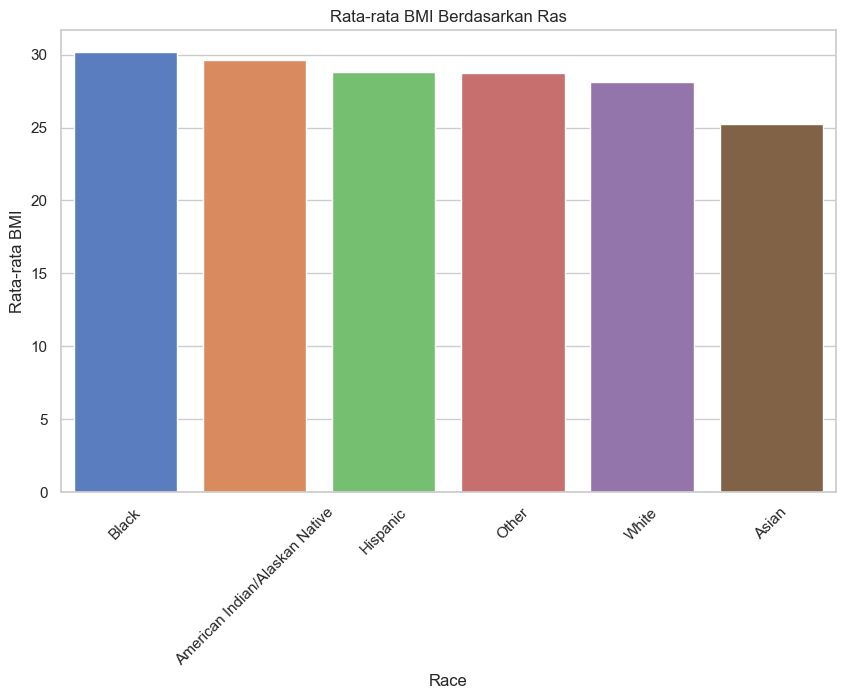

In [23]:
# Hitung rata-rata BMI untuk setiap ras
avg_bmi_by_race = df.groupby('Race')['BMI'].mean().reset_index()

# Urutkan DataFrame berdasarkan rata-rata BMI
avg_bmi_by_race_sorted = avg_bmi_by_race.sort_values(by='BMI', ascending=False)

# Atur gaya dan ukuran plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Buat bar chart
sns.barplot(data=avg_bmi_by_race_sorted, x='Race', y='BMI', palette='muted')

# Tambahkan judul dan label
plt.title('Rata-rata BMI Berdasarkan Ras')
plt.xlabel('Race')
plt.ylabel('Rata-rata BMI')

# Memiringkan label sumbu x
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()

Dapat terlihat bahwa berat badan pada tiap ras sangat beragam dimana Ras Black dan American Indian/Alaskan Native memiliki berat badan cukup tinggi hal ini mengindikasikan tingkat ketinggian heart disease pada tiap ras memungkinkan dipengaruhi oleh BMI.

__6. Bagaimana hubungan variabel-variabel dengan Heart Disease?__

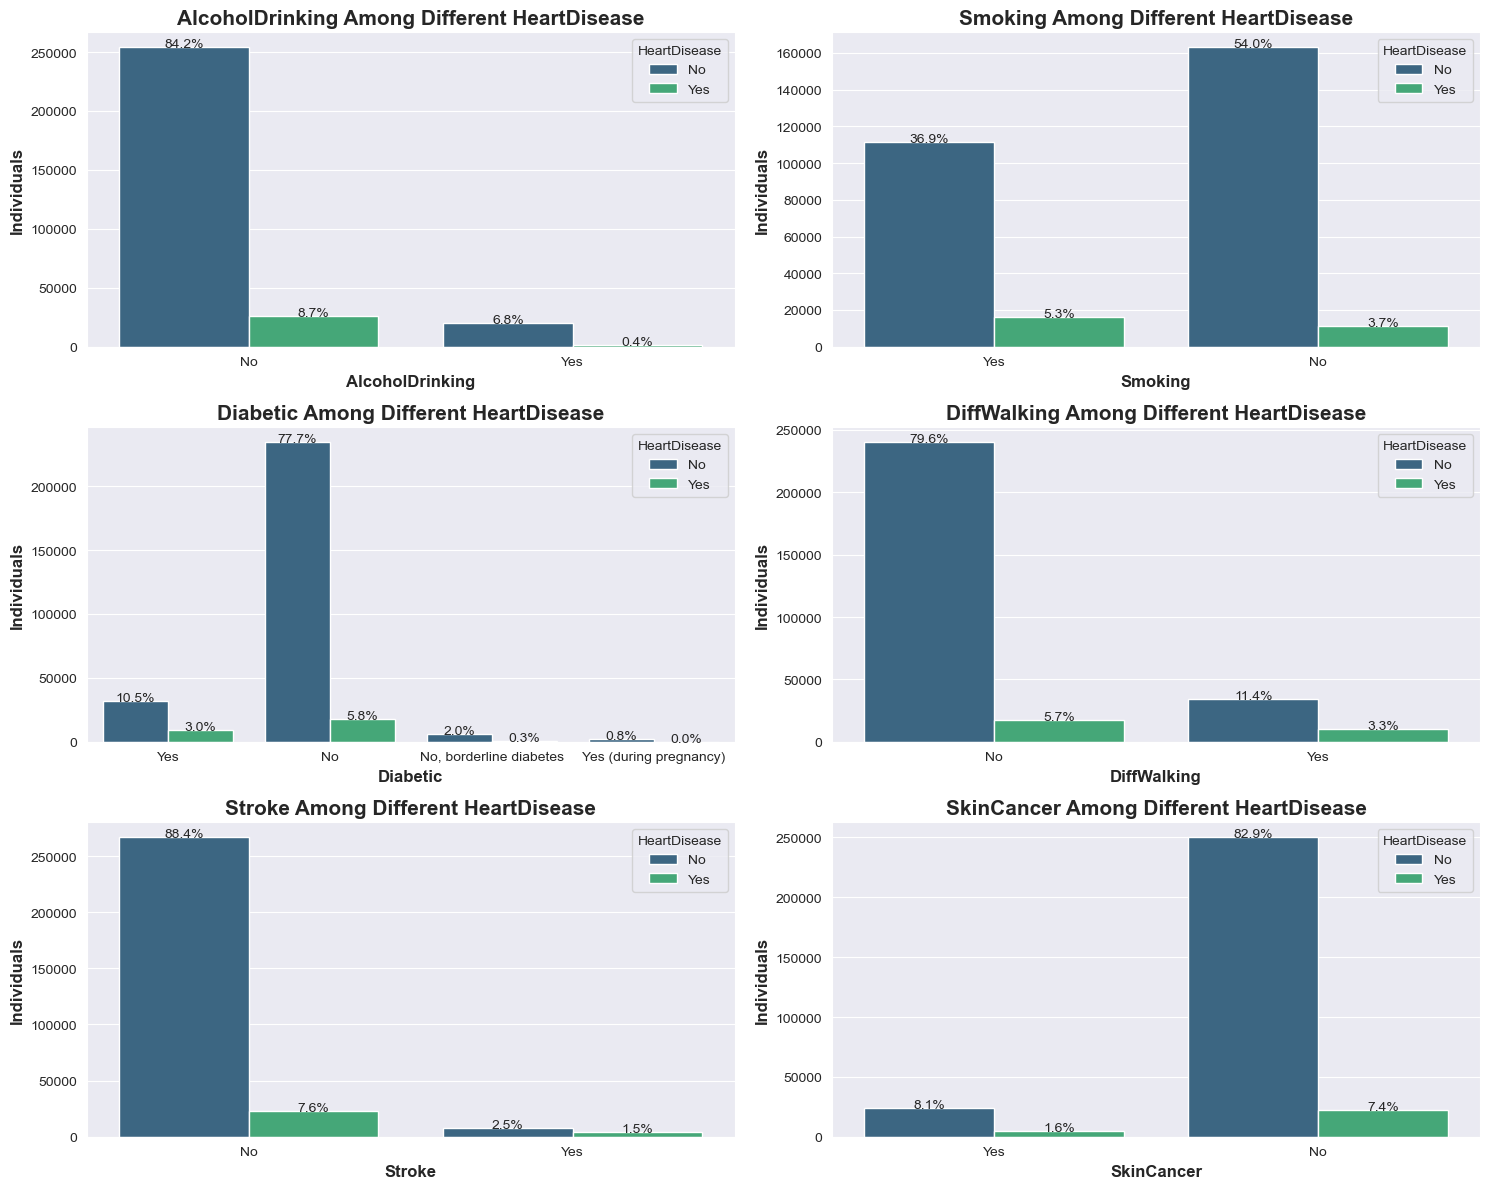

In [8]:
# Fungsi untuk mengatur ukuran figure dan gaya seaborn
def set_size_style(width, height, style=None):
    # Mengatur ukuran figure
    plt.figure(figsize=(width, height))
    # Jika gaya diberikan, mengatur gaya seaborn
    if style != None:
        sns.set_style(style)

# Fungsi untuk menyesuaikan plot
def customize_plot(plot, title: str, xlabel: str, ylabel: str, title_font: int, label_font: int):
    # Mengatur judul plot dengan ukuran font dan tebal huruf
    plot.set_title(title, fontsize=title_font, weight='bold')
    # Mengatur label sumbu x dengan ukuran font dan tebal huruf
    plot.set_xlabel(xlabel, fontsize=label_font, weight='bold')
    # Mengatur label sumbu y dengan ukuran font dan tebal huruf
    plot.set_ylabel(ylabel, fontsize=label_font, weight='bold')

# Daftar faktor risiko
risk_factors = ['AlcoholDrinking', 'Smoking', 'Diabetic', 'DiffWalking', 'Stroke', 'SkinCancer']

# Mengatur ukuran dan gaya plot
set_size_style(15, 12, 'darkgrid')

# Iterasi melalui setiap faktor risiko
for i, risk_factor in enumerate(risk_factors, 1):
    # Membuat subplot pada grid 3x2, dengan posisi subplot ke-i
    plt.subplot(3, 2, i)
    # Membuat countplot untuk faktor risiko dengan pembagian berdasarkan jenis kelamin
    ax = sns.countplot(data=df, x=risk_factor, hue='HeartDisease', palette='viridis')
    # Menyesuaikan plot dengan judul, label sumbu x dan y, serta ukuran font
    customize_plot(ax, f"{risk_factor} Among Different HeartDisease", risk_factor, "Individuals", 15, 12)
    
    # Menghitung persentase untuk setiap kategori (Ya/Tidak)
    total_counts = len(df[risk_factor])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.1f}%'.format((height / total_counts) * 100),
                ha="center")  # Menambahkan teks di tengah bar, di atasnya
    
# Menambahkan ruang ekstra antara subplot untuk tata letak yang lebih rapi
plt.tight_layout()
# Menampilkan plot
plt.show()

Insight :
1. Orang yang tidak minum alkohol memiliki tingkat heart disease yang tinggi dengan 8,7%.
2. Orang yang merokok memiliki tingkat heart disease yang tinggi sebesar 5,3%
3. Orang yang tidak memiliki diabetes cenderung memiliki heart disease 5,8%
4. Orang yang mengalami difficult walking cenderung memiliki heart disease yang rendah (3,3%) dibandingkan yang tidak mengalami difficult walking (5,7%)
4. Orang yang tidak memiliki stroke cenderung memiliki heart disease 5,7%
5. Orang yang tidak memiliki skin cancer cenderung memiiki heart disease yang tinggi.

__7. Bagaimana pengaruh umur terhadap kolom lain berdasarkan heart disease/no heart disease?__

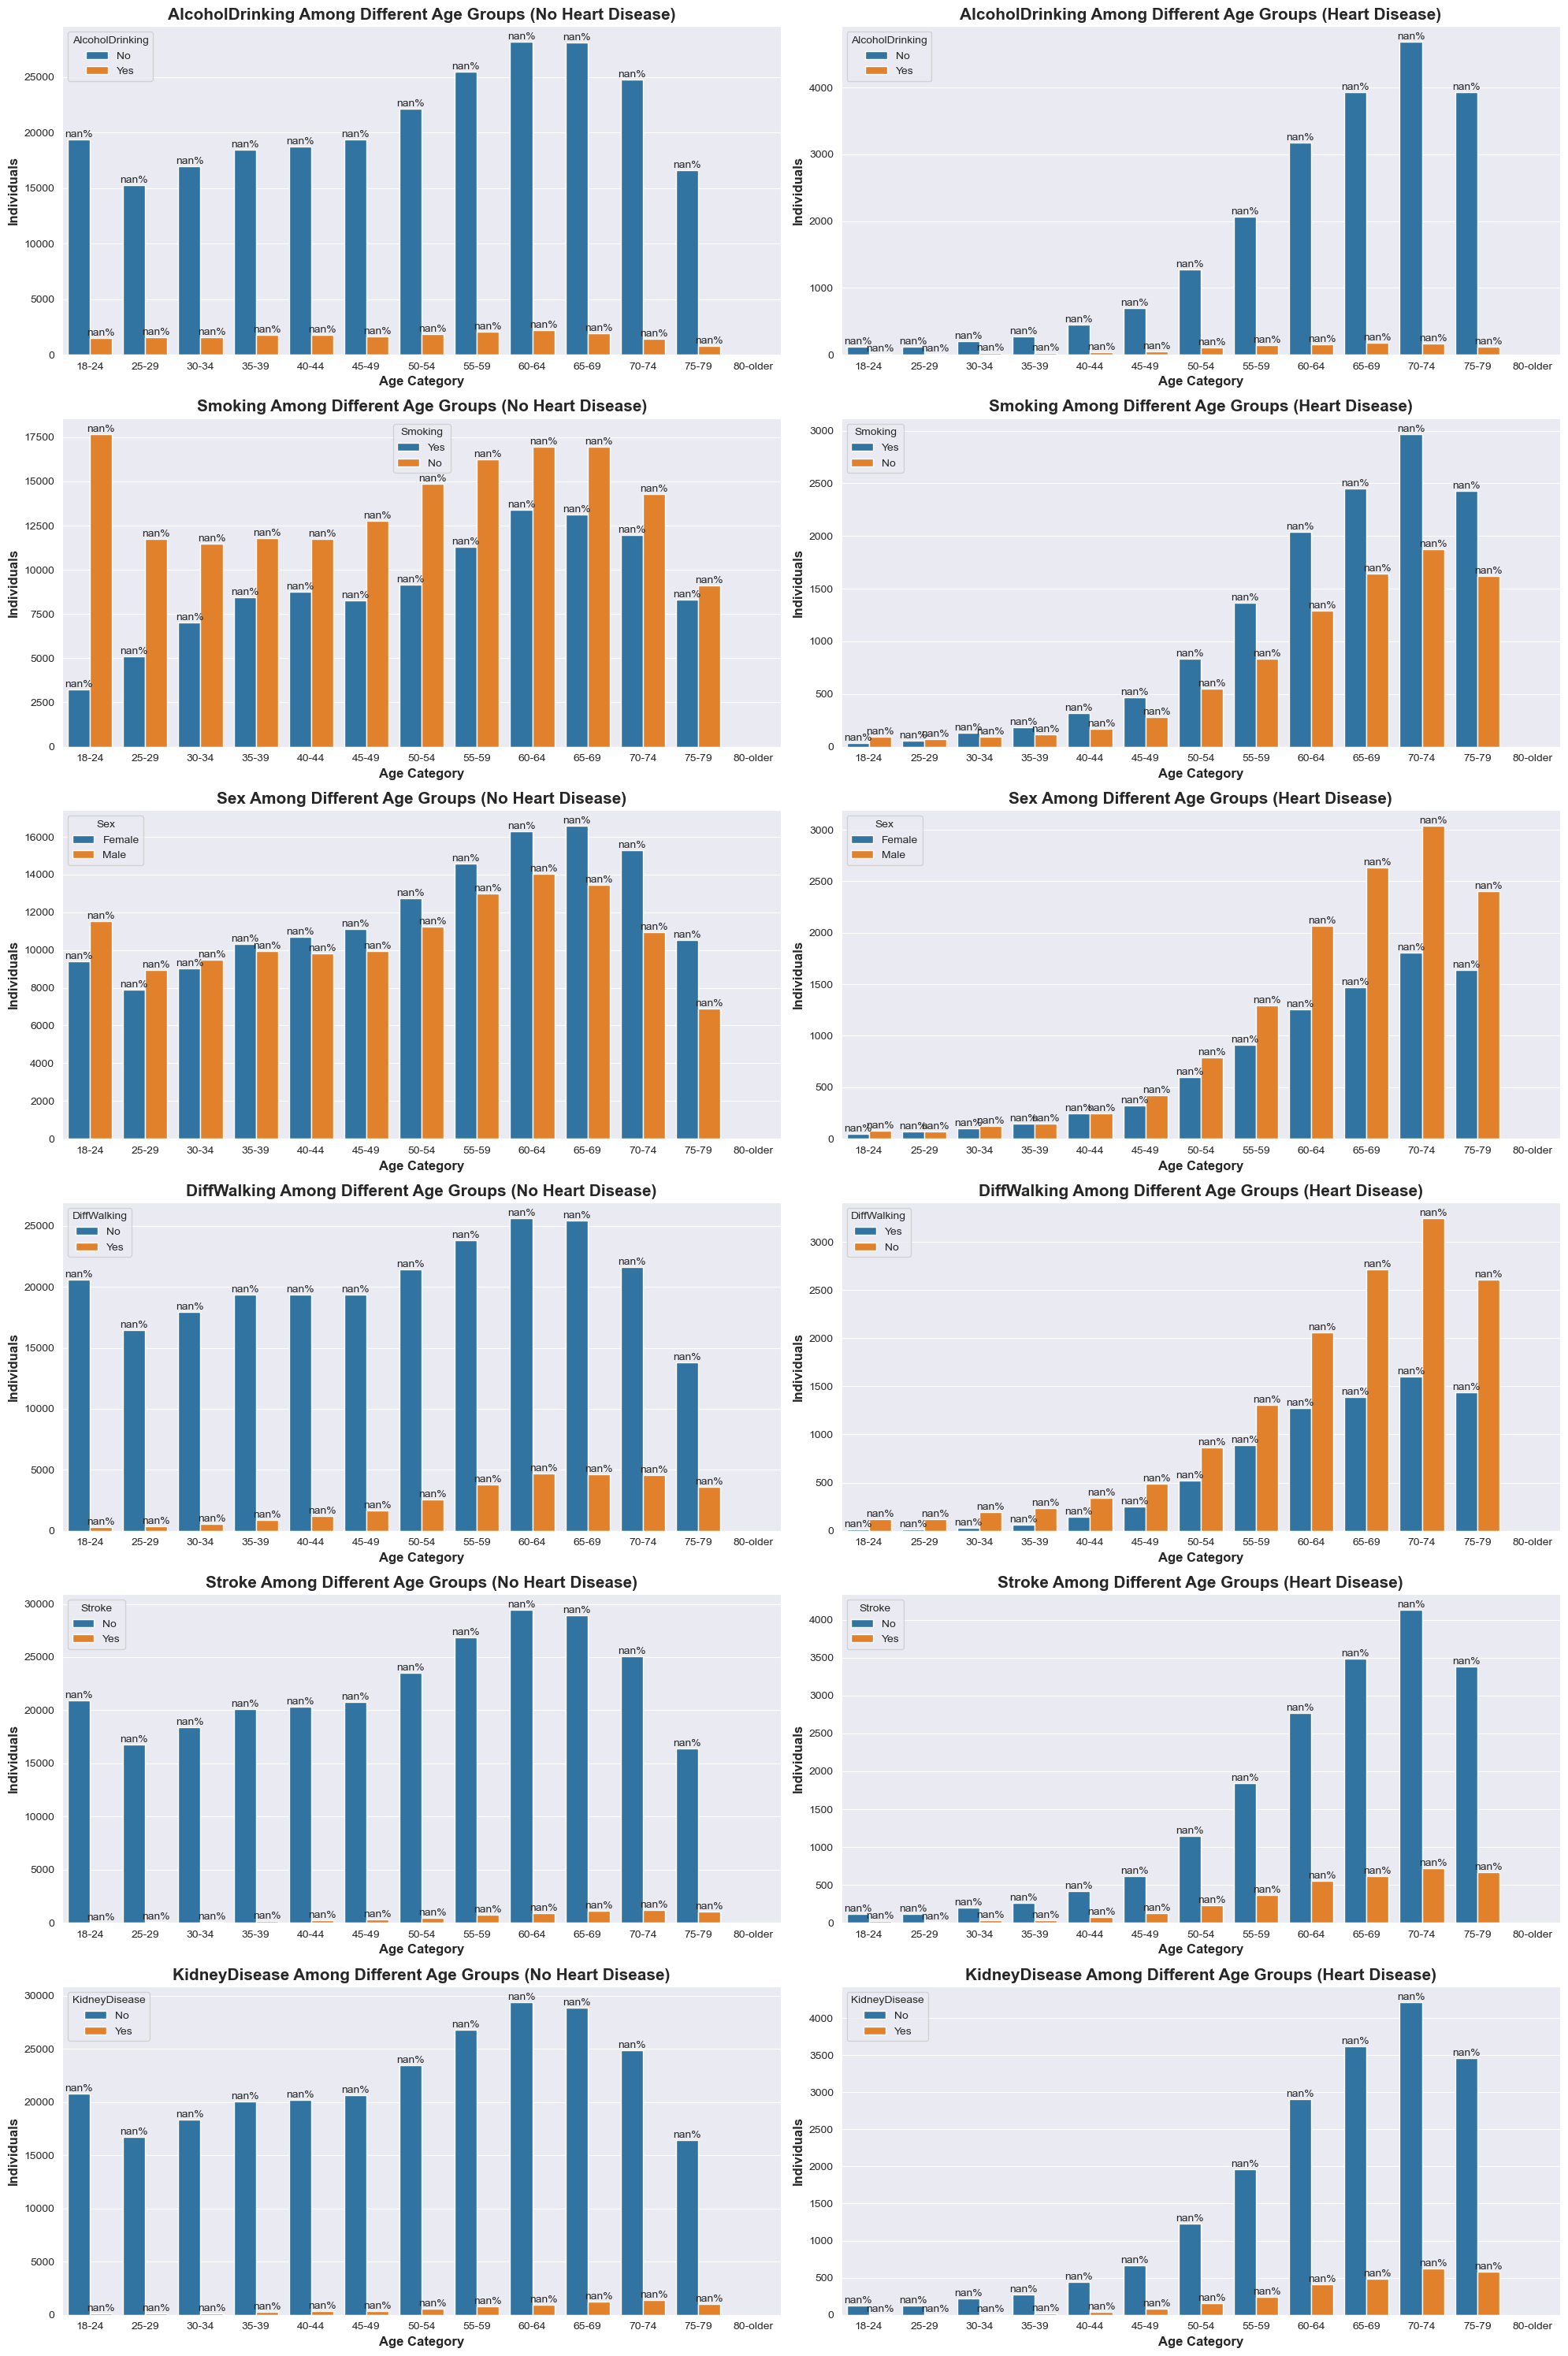

In [8]:
age_order = [
    '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-older'
]

# Fungsi untuk mengatur ukuran figure dan gaya seaborn
def set_size_style(width, height, style=None):
    # Membuat figure dengan ukuran yang ditentukan
    plt.figure(figsize=(width, height))
    # Jika gaya diberikan, mengatur gaya seaborn
    if style is not None:
        sns.set_style(style)

# Fungsi untuk menyesuaikan plot dengan judul, label sumbu x dan y, serta ukuran font
def customize_plot(plot, title: str, xlabel: str, ylabel: str, title_font: int, label_font: int):
    # Mengatur judul plot dengan ukuran font dan ketebalan huruf
    plot.set_title(title, fontsize=title_font, weight='bold')
    # Mengatur label sumbu x dengan ukuran font dan ketebalan huruf
    plot.set_xlabel(xlabel, fontsize=label_font, weight='bold')
    # Mengatur label sumbu y dengan ukuran font dan ketebalan huruf
    plot.set_ylabel(ylabel, fontsize=label_font, weight='bold')

# Daftar faktor risiko
risk_factors = ['AlcoholDrinking', 'Smoking', 'Sex', 'DiffWalking', 'Stroke', 'KidneyDisease']

# Mengatur ukuran dan gaya plot
set_size_style(20, 30, 'darkgrid')

# Iterasi melalui setiap faktor risiko
for i, risk_factor in enumerate(risk_factors, 1):
    # Membuat subplot pada grid 5x2, dengan posisi subplot ke-i
    plt.subplot(len(risk_factors), 2, 2 * i - 1)
    # Membuat countplot untuk faktor risiko tanpa heart disease
    ax1 = sns.countplot(data=df[df['HeartDisease'] == 'No'], x='AgeCategory', hue=risk_factor, order=age_order)
    customize_plot(ax1, f"{risk_factor} Among Different Age Groups (No Heart Disease)", "Age Category", "Individuals", 15, 12)
    for c in ax1.containers:
        labels = [f'{h / sum(c.datavalues):.1%}' for h in c.datavalues]
        ax1.bar_label(c, labels=labels)
        
    # Membuat subplot untuk heart disease
    plt.subplot(len(risk_factors), 2, 2 * i)
    ax2 = sns.countplot(data=df[df['HeartDisease'] == 'Yes'], x='AgeCategory', hue=risk_factor, order=age_order)
    customize_plot(ax2, f"{risk_factor} Among Different Age Groups (Heart Disease)", "Age Category", "Individuals", 15, 12)
    for c in ax2.containers:
        labels = [f'{h / sum(c.datavalues):.1%}' for h in c.datavalues]
        ax2.bar_label(c, labels=labels)

# Menambahkan ruang ekstra antara subplot untuk tata letak yang lebih rapi
plt.tight_layout()
# Menampilkan plot
plt.show()

Dapat terlihat pada gambar diatas :
1. Tingkat peminum alkohol yang mengalami heart disease paling tertinggi terdapat pada umur 50-80, dimana dapat diindikasikan alkohol dapat berpengaruh pada kesehatan jantung apalagi diusia tua.
2. Perokok tertinggi dengan heart disease ada pada umur 50-80 tahun.
3. Gender dengan tingkat heart disease tertinggi ada pada umur 70-74 dan bergender laki-laki, dapat diindikasikan dikarenakan minum alkohol dan merokok tertinggi.
4. Orang yang memiliki penyakit komplikasi (Stroke & Heart Disease) tertinggi ada pada umur 50-80 tahun.
5. Orang yang memiliki penyakit komplikasi (KidneyDisease & Heart Disease) tertinggi ada pada umur 50-80 tahun.
6. DiffWalking rata-rata berada di umur 60-80, diindikasikan memiliki penyakit komplikasi selain heart disease yang membuat susah untuk beraktivitas.

 __8. Bagaimana trend kolom numerik berpengaruh pada Heart Disease?__

In [27]:
# Mengambil kolom-kolom numerik dari dataframe dan menyatukannya dengan kolom 'HeartDisease'
df_numerical = df._get_numeric_data()
df_numerical = df_numerical.join(df['HeartDisease'])

# Fungsi untuk plot KDE (Kernel Density Estimation)
def plot_kde(feature):
    # Membuat figure dan axis untuk plot
    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
    
    # Menggambar KDE plot untuk individu dengan penyakit jantung ('Yes') dengan warna hijau
    sns.kdeplot(df_numerical.loc[(df_numerical['HeartDisease']=='Yes'), feature], color='g', shade=True, label='Yes')
    
    # Menggambar KDE plot untuk individu tanpa penyakit jantung ('No') dengan warna merah
    sns.kdeplot(df_numerical.loc[(df_numerical['HeartDisease']=='No'), feature], color='r', shade=True, label='No')
    
    # Menambahkan judul plot dengan nama fitur dan label 'with Heart Disease'
    plt.title(f'{feature} with Heart Disease')
    
    # Menambahkan legenda dengan label 'Yes' dan 'No' untuk HeartDisease
    plt.legend(title='HeartDisease?', fontsize=15, title_fontsize=15)
    
    # Menampilkan plot
    plt.show()


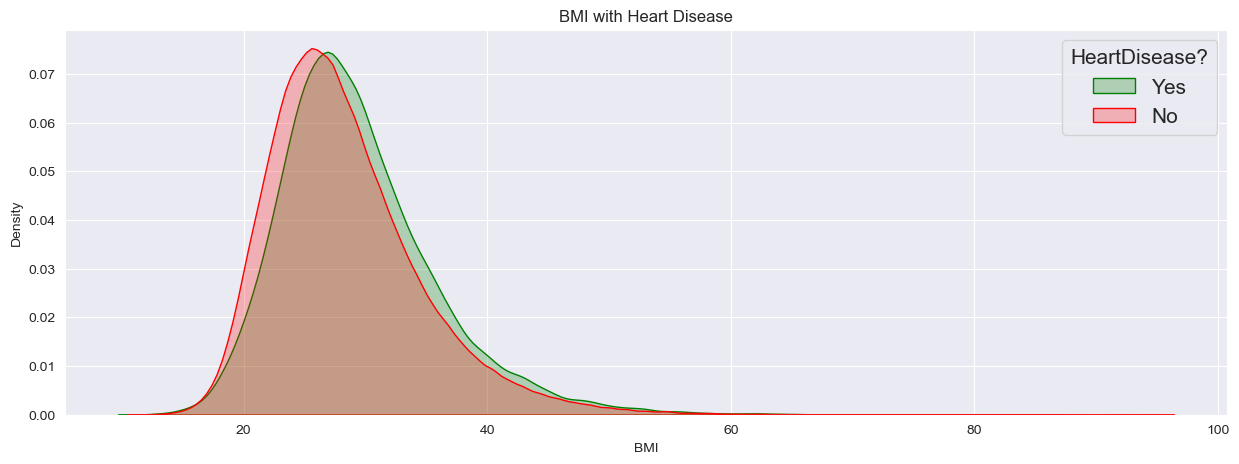

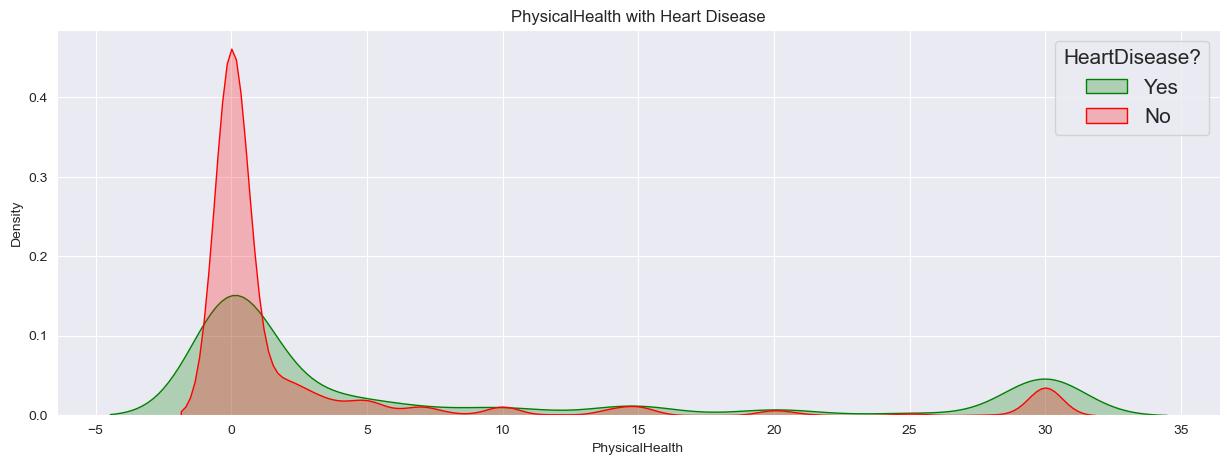

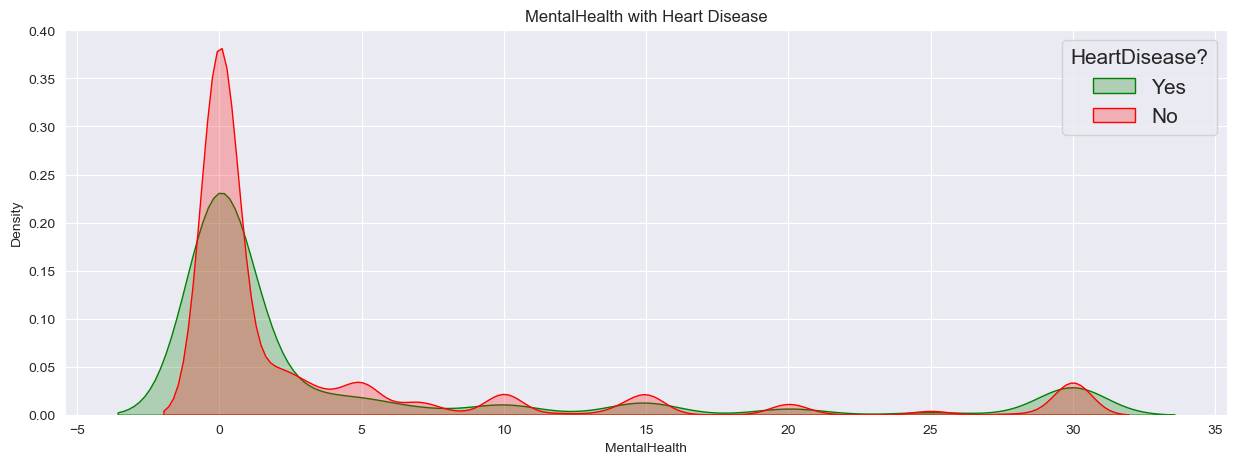

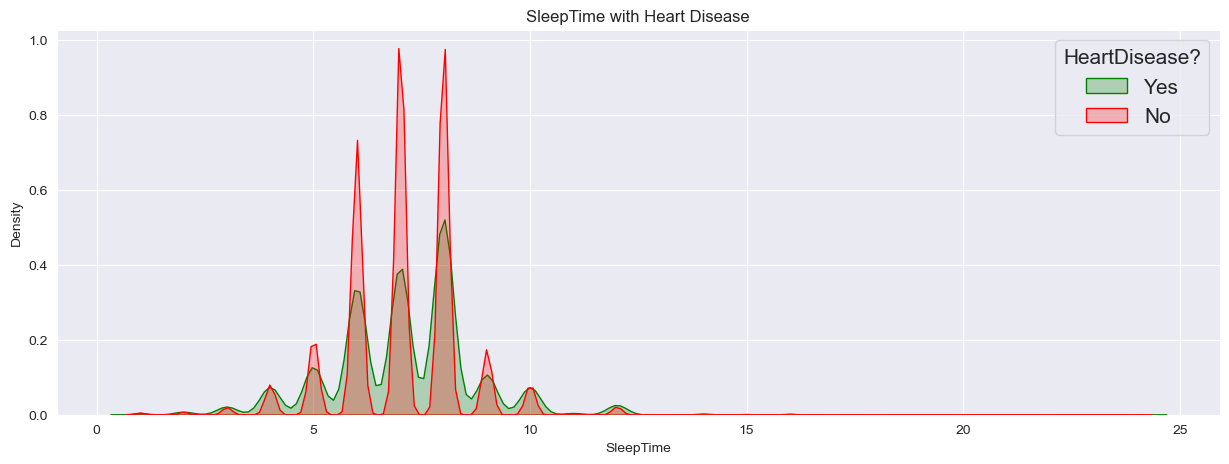

In [28]:
for feature in df_numerical.iloc[:, :-1]:
    plot_kde(feature)

1. Kita juga dapat melihat bahwa jam tidur yang sehat dapat menyebabkan penyakit jantung, seperti kasus aneh pada BMI (kelebihan berat badan tetapi tidak memiliki penyakit jantung), tetapi juga memiliki berat badan yang tinggi dapat menyebabkan penyakit jantung.
2. Kesehatan fisik bukan satu-satunya indikator yang baik untuk menyimpulkan penyakit jantung.
3. Kesehatan mental mengikuti distribusi yang sama dengan kesehatan fisik dan juga bukan satu-satunya indikator yang baik untuk menyimpulkan penyakit jantung.
4. Waktu tidur menarik karena, terlepas dari apakah mereka mengikuti kebiasaan tidur yang baik atau tidak, beberapa orang bisa terhindar dari penyakit jantung dan beberapa tidak.

__melakukan hypotest testing untuk melihat hubungan antara BMI dengan HeartDisease__

In [13]:
# Pisahkan data BMI berdasarkan kategori heart disease
bmi_yes = df[df['HeartDisease'] == 'Yes']['BMI']
bmi_no = df[df['HeartDisease'] == 'No']['BMI']

# Lakukan uji t-test independen
t_stat, p_value = stats.ttest_ind(bmi_yes, bmi_no)

# Tampilkan hasil uji hipotesis
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam BMI antara orang dengan dan tanpa heart disease.")
else:
    print("Tidak terdapat perbedaan signifikan dalam BMI antara orang dengan dan tanpa heart disease.")

T-statistic: 29.33421693628801
P-value: 6.779455035549849e-189
Terdapat perbedaan signifikan dalam BMI antara orang dengan dan tanpa heart disease.


__9. Bagaimana trend umur berpengaruh pada heart disease berdasarkan numerik kolom?__

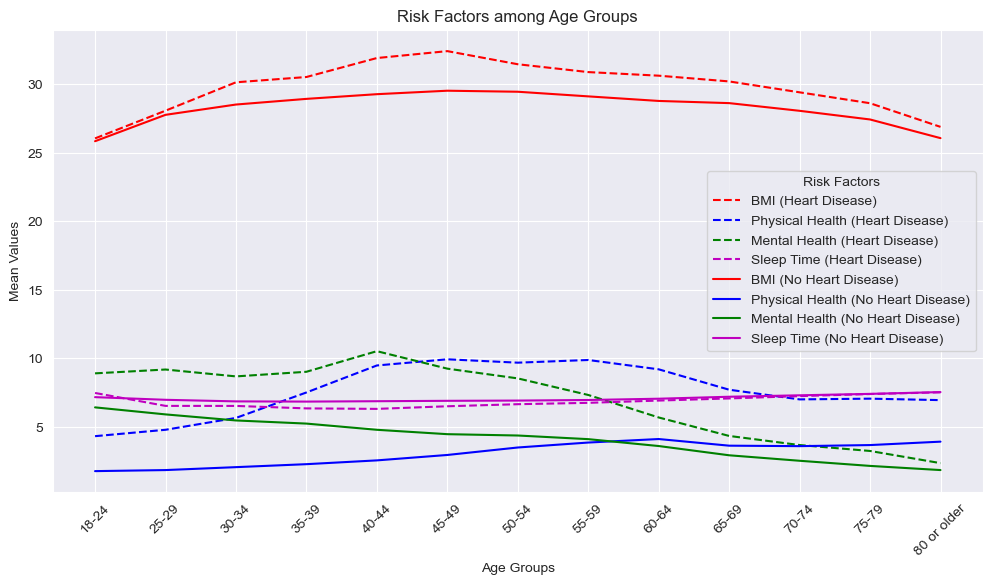

In [9]:
# Mengelompokkan data berdasarkan kategori 'AgeCategory' dan 'HeartDisease', lalu menghitung rata-rata beberapa fitur
other_risk_factor_among_agegroups = df.groupby(['AgeCategory', 'HeartDisease']).agg({
    'BMI': 'mean', 
    'PhysicalHealth': 'mean', 
    'MentalHealth': 'mean', 
    'SleepTime': 'mean'
}).reset_index()

# Fungsi untuk mengatur ukuran dan gaya plot
def set_size_style(width, height, style):
    plt.figure(figsize=(width, height))
    sns.set_style(style)

# Mengatur ukuran dan gaya plot menggunakan fungsi set_size_style
set_size_style(12, 6, 'darkgrid')

# Memberi label sumbu y dengan 'Mean Values' dan label sumbu x dengan 'Age Groups', serta judul plot
plt.ylabel('Mean Values')
plt.xlabel('Age Groups')
plt.title('Risk Factors among Age Groups')

# Menggambar garis plot untuk setiap fitur dan kategori 'HeartDisease' ('Yes' atau 'No')
ax = sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'Yes'], x='AgeCategory', y='BMI', label='BMI (Heart Disease)', color='r', linestyle='--')
sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'Yes'], x='AgeCategory', y='PhysicalHealth', label='Physical Health (Heart Disease)', color='b', linestyle='--')
sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'Yes'], x='AgeCategory', y='MentalHealth', label='Mental Health (Heart Disease)', color='g', linestyle='--')
sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'Yes'], x='AgeCategory', y='SleepTime', label='Sleep Time (Heart Disease)', color='m', linestyle='--')

sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'No'], x='AgeCategory', y='BMI', label='BMI (No Heart Disease)', color='r')
sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'No'], x='AgeCategory', y='PhysicalHealth', label='Physical Health (No Heart Disease)', color='b')
sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'No'], x='AgeCategory', y='MentalHealth', label='Mental Health (No Heart Disease)', color='g')
sns.lineplot(data=other_risk_factor_among_agegroups[other_risk_factor_among_agegroups['HeartDisease'] == 'No'], x='AgeCategory', y='SleepTime', label='Sleep Time (No Heart Disease)', color='m')

# Menambahkan legenda dengan judul 'Risk Factors'
plt.legend(title='Risk Factors')
# Mengatur rotasi label sumbu x menjadi 45 derajat untuk lebih baik dalam pembacaan
plt.xticks(rotation=45)
# Menampilkan plot
plt.show()


Insight :
1. BMI yang tinggi dapat mengindikasikan Heart disease
2. Memiliki masalah mental health juga dapat mengindikasikan heart disease pada rentang umur 40-69 tahun(tertinggi)
3. Orang yang physical healthnya rendah cenderung tidak memiliki heart disease
4. Walaupun berbeda tipis, orang yang tidak memiliki heart disease mempunyai jam tidur yang lebih tinggi.

### DATA ENCODING

Karena terdapat banyak data Yes/No, dan data bertipe Object, mari lakukan data encoding!

### ONE HOT ENCODING

In [24]:
columns_to_convert = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Membuat dictionary untuk mapping nilai Yes/No dan Male/Female
yes_no_mapping = {'Yes': 1, 'No': 0}
sex_mapping = {'Male': 1, 'Female': 0}

# Mengganti nilai pada setiap kolom
for column in columns_to_convert:
    if column in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
        df[column] = df[column].map(yes_no_mapping)
    elif column == 'Sex':
        df[column] = df[column].map(sex_mapping)

### FREQUENCY ENCODING

In [25]:
count_freq_age = df.groupby('AgeCategory').size()
count_freq_age
freq_ = count_freq_age/len(df['AgeCategory'])
df['AgeCategory'] = df['AgeCategory'].map(freq_).round(2)

In [26]:
count_freq_race = df.groupby('Race').size()
count_freq_race
freq_1 = count_freq_race/len(df['Race'])
df['Race'] = df['Race'].map(freq_1).round(2)

In [27]:
count_freq_diabet = df.groupby('Diabetic').size()
count_freq_diabet
freq_2 = count_freq_diabet/len(df['Diabetic'])
df['Diabetic'] = df['Diabetic'].map(freq_2).round(2)

### ORDINAL ENCODING

In [28]:
map_class = {
    'Excellent': 1,
    'Good': 2,
    'Very good': 3,
    'Fair': 4,
    'Poor': 5
}

df['GenHealth'] = df['GenHealth'].map(map_class)
df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0               30.0            0    0         0.09  0.77      0.13   
1                0.0            0    0         0.08  0.77      0.84   
2               30.0            0    1         0.11  0.77      0.13   
3                0.0            0    0         0.07  0.77      0.84   
4                0.0            1    0         0.07  0.77      0.84   
...              ...          ...  ...          ...   ...       ...   
319790           0.0            1    1         0.11  0.09      0.13   
319791           0.0            0    1         0.06  0.09      0.84   
319792           0.0            0    0         0.07  0.09      0.84   
319793           0.0            0    0         0.05  0.09      0.84   
319794           0.0            0    0         0.08  0.09      0.84   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3        5.0       1              0   
1                      1          3        7.0       0              0   
2                      1          4        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          3        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          4        6.0       1              0   
319791                 1          3        5.0       1              0   
319792                 1          2        6.0       0              0   
319793                 0          2       12.0       0              0   
319794                 1          2        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

# MODELLING

### SPLITTING DATA

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## BASELINE MODEL

__RANDOM FOREST__

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('F1 Score ',f1_score(y_test, y_pred_rf))
print('Precision ',precision_score(y_test, y_pred_rf))
print('Recall ',recall_score(y_test, y_pred_rf))

F1 Score  0.16165159897449738
Precision  0.30545639979602246
Recall  0.10990825688073394


__DECISION TREE__

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print('F1 Score ',f1_score(y_test, y_pred_dt))
print('Precision ',precision_score(y_test, y_pred_dt))
print('Recall ',recall_score(y_test, y_pred_dt))

F1 Score  0.21356984478935698
Precision  0.20669527896995707
Recall  0.22091743119266055


__XGBOOST__

In [16]:
from xgboost import XGBClassifier, XGBRegressor

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('F1 Score ',f1_score(y_test, y_pred_xgb))
print('Precision ',precision_score(y_test, y_pred_xgb))
print('Recall ',recall_score(y_test, y_pred_xgb))

F1 Score  0.15399002493765584
Precision  0.5113871635610766
Recall  0.09064220183486238


__KNN__

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('F1 Score ',f1_score(y_test, y_pred_knn))
print('Precision ',precision_score(y_test, y_pred_knn))
print('Recall ',recall_score(y_test, y_pred_knn))

F1 Score  0.10388812048563087
Precision  0.3197729422894986
Recall  0.06201834862385321


Nilai F1 Score pada seluruh baseline model sangat kecil, mungkin dikarenakan data yang imbalance, we'll see later!

### OUTLIERS

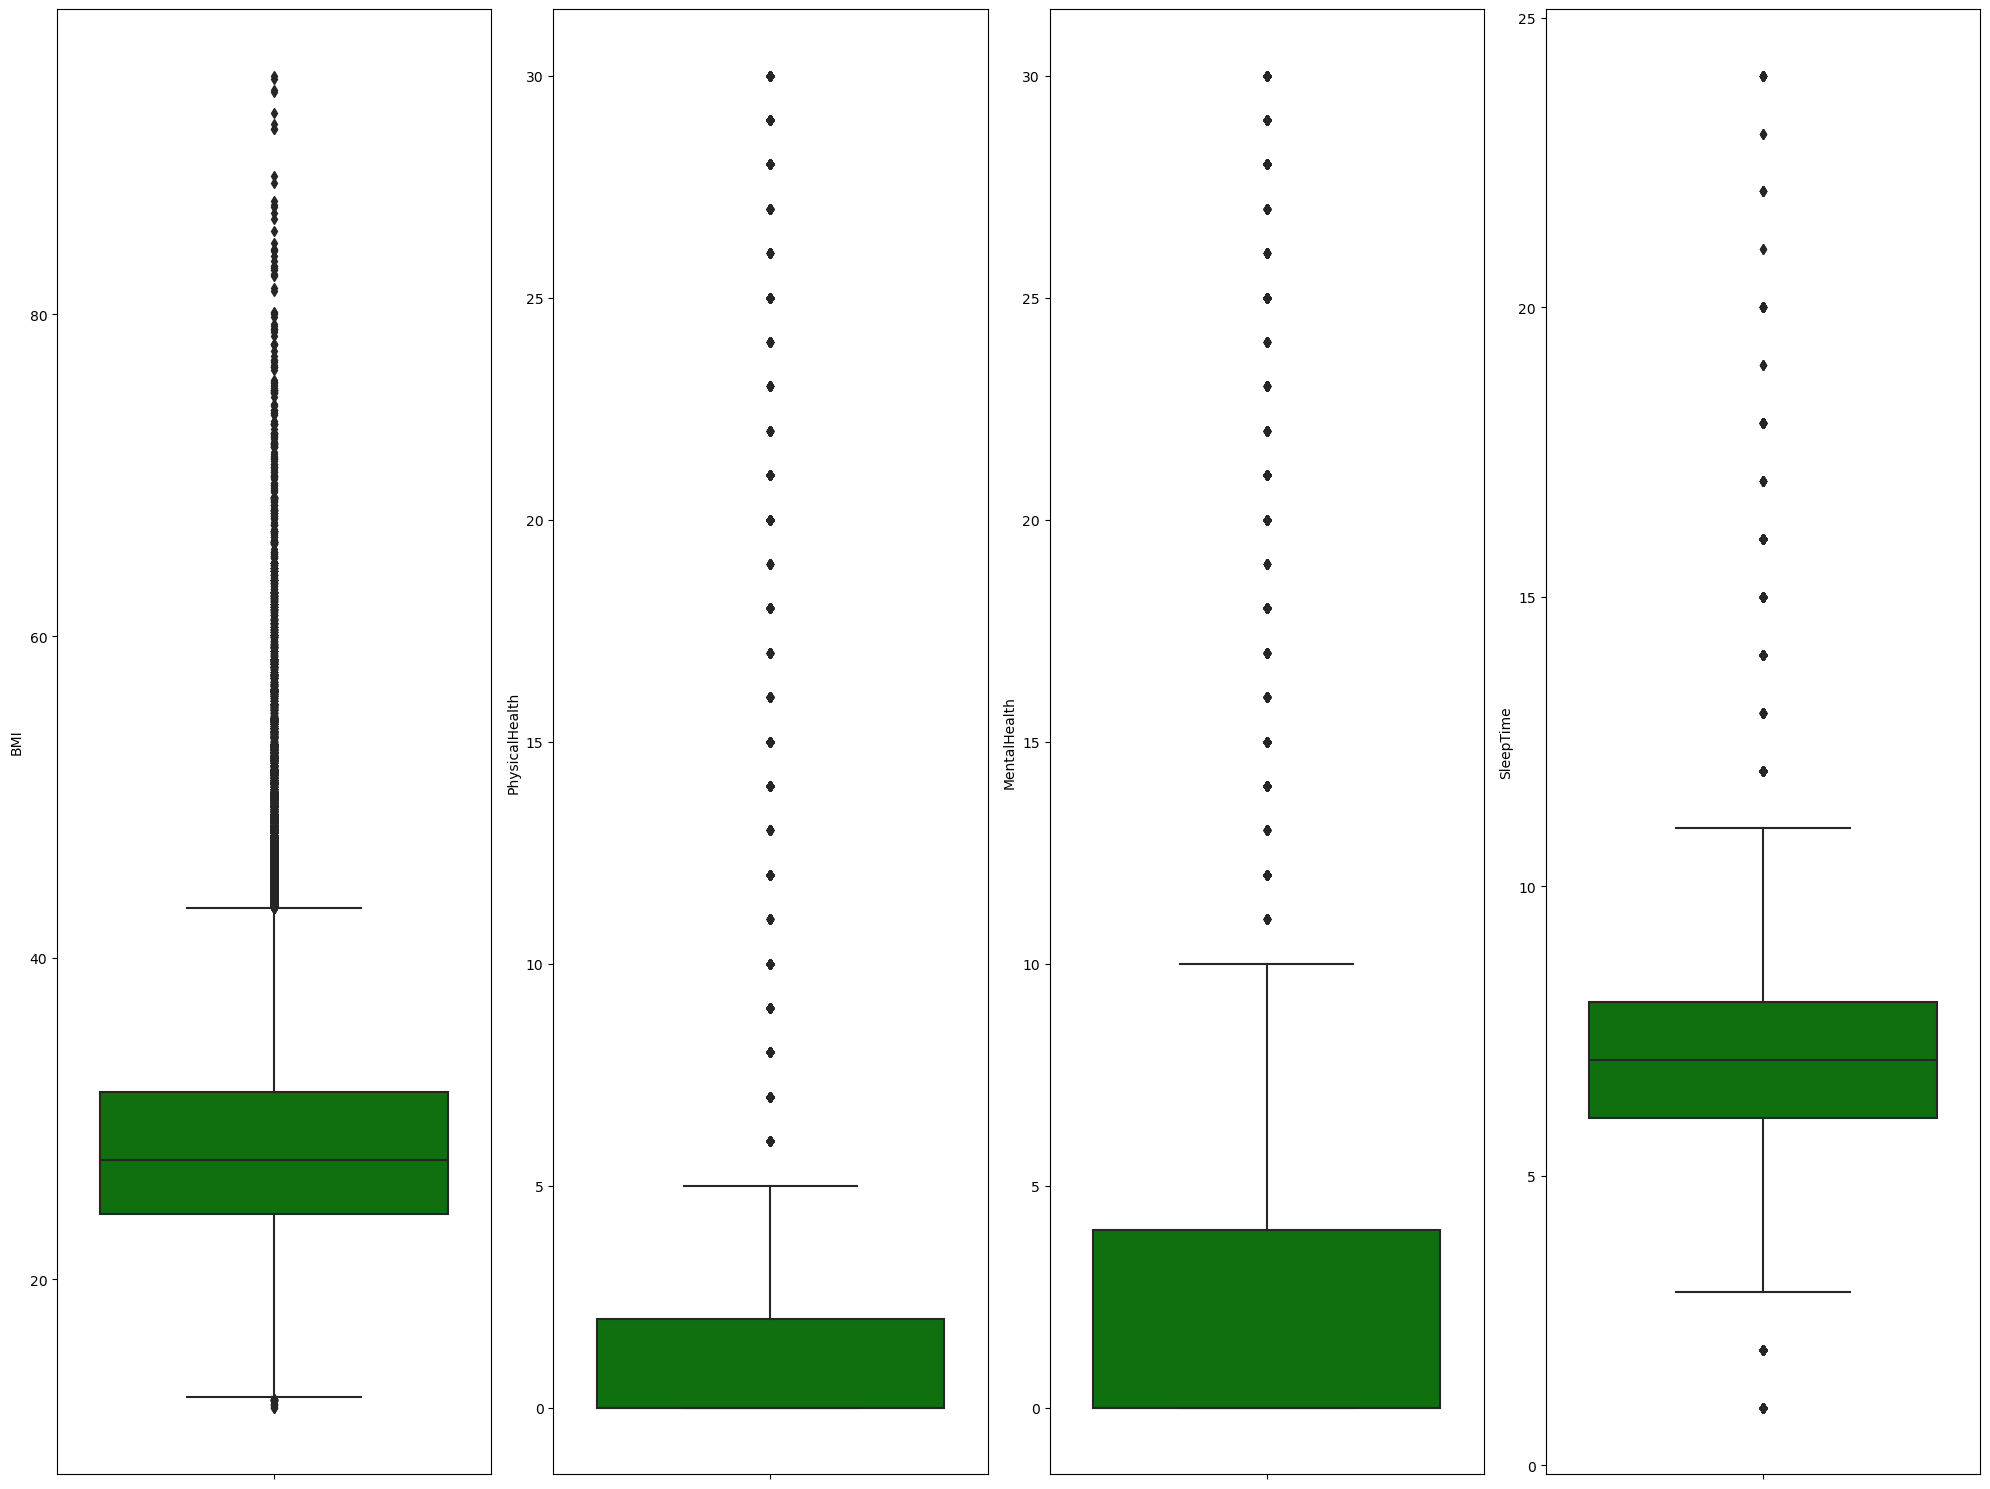

In [14]:
numsbin = ['BMI','PhysicalHealth', 'MentalHealth','SleepTime' ]

plt.figure(figsize=(20,15))
features = numsbin
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

Wow, ternyata banyak outliers di data kita!

__OUTLIERS HANDLING__

In [13]:
outlier_features =['BMI','PhysicalHealth', 'MentalHealth','SleepTime']
for i in outlier_features:
    df[i] = np.log(df[i]+1)

__RECHECKING__

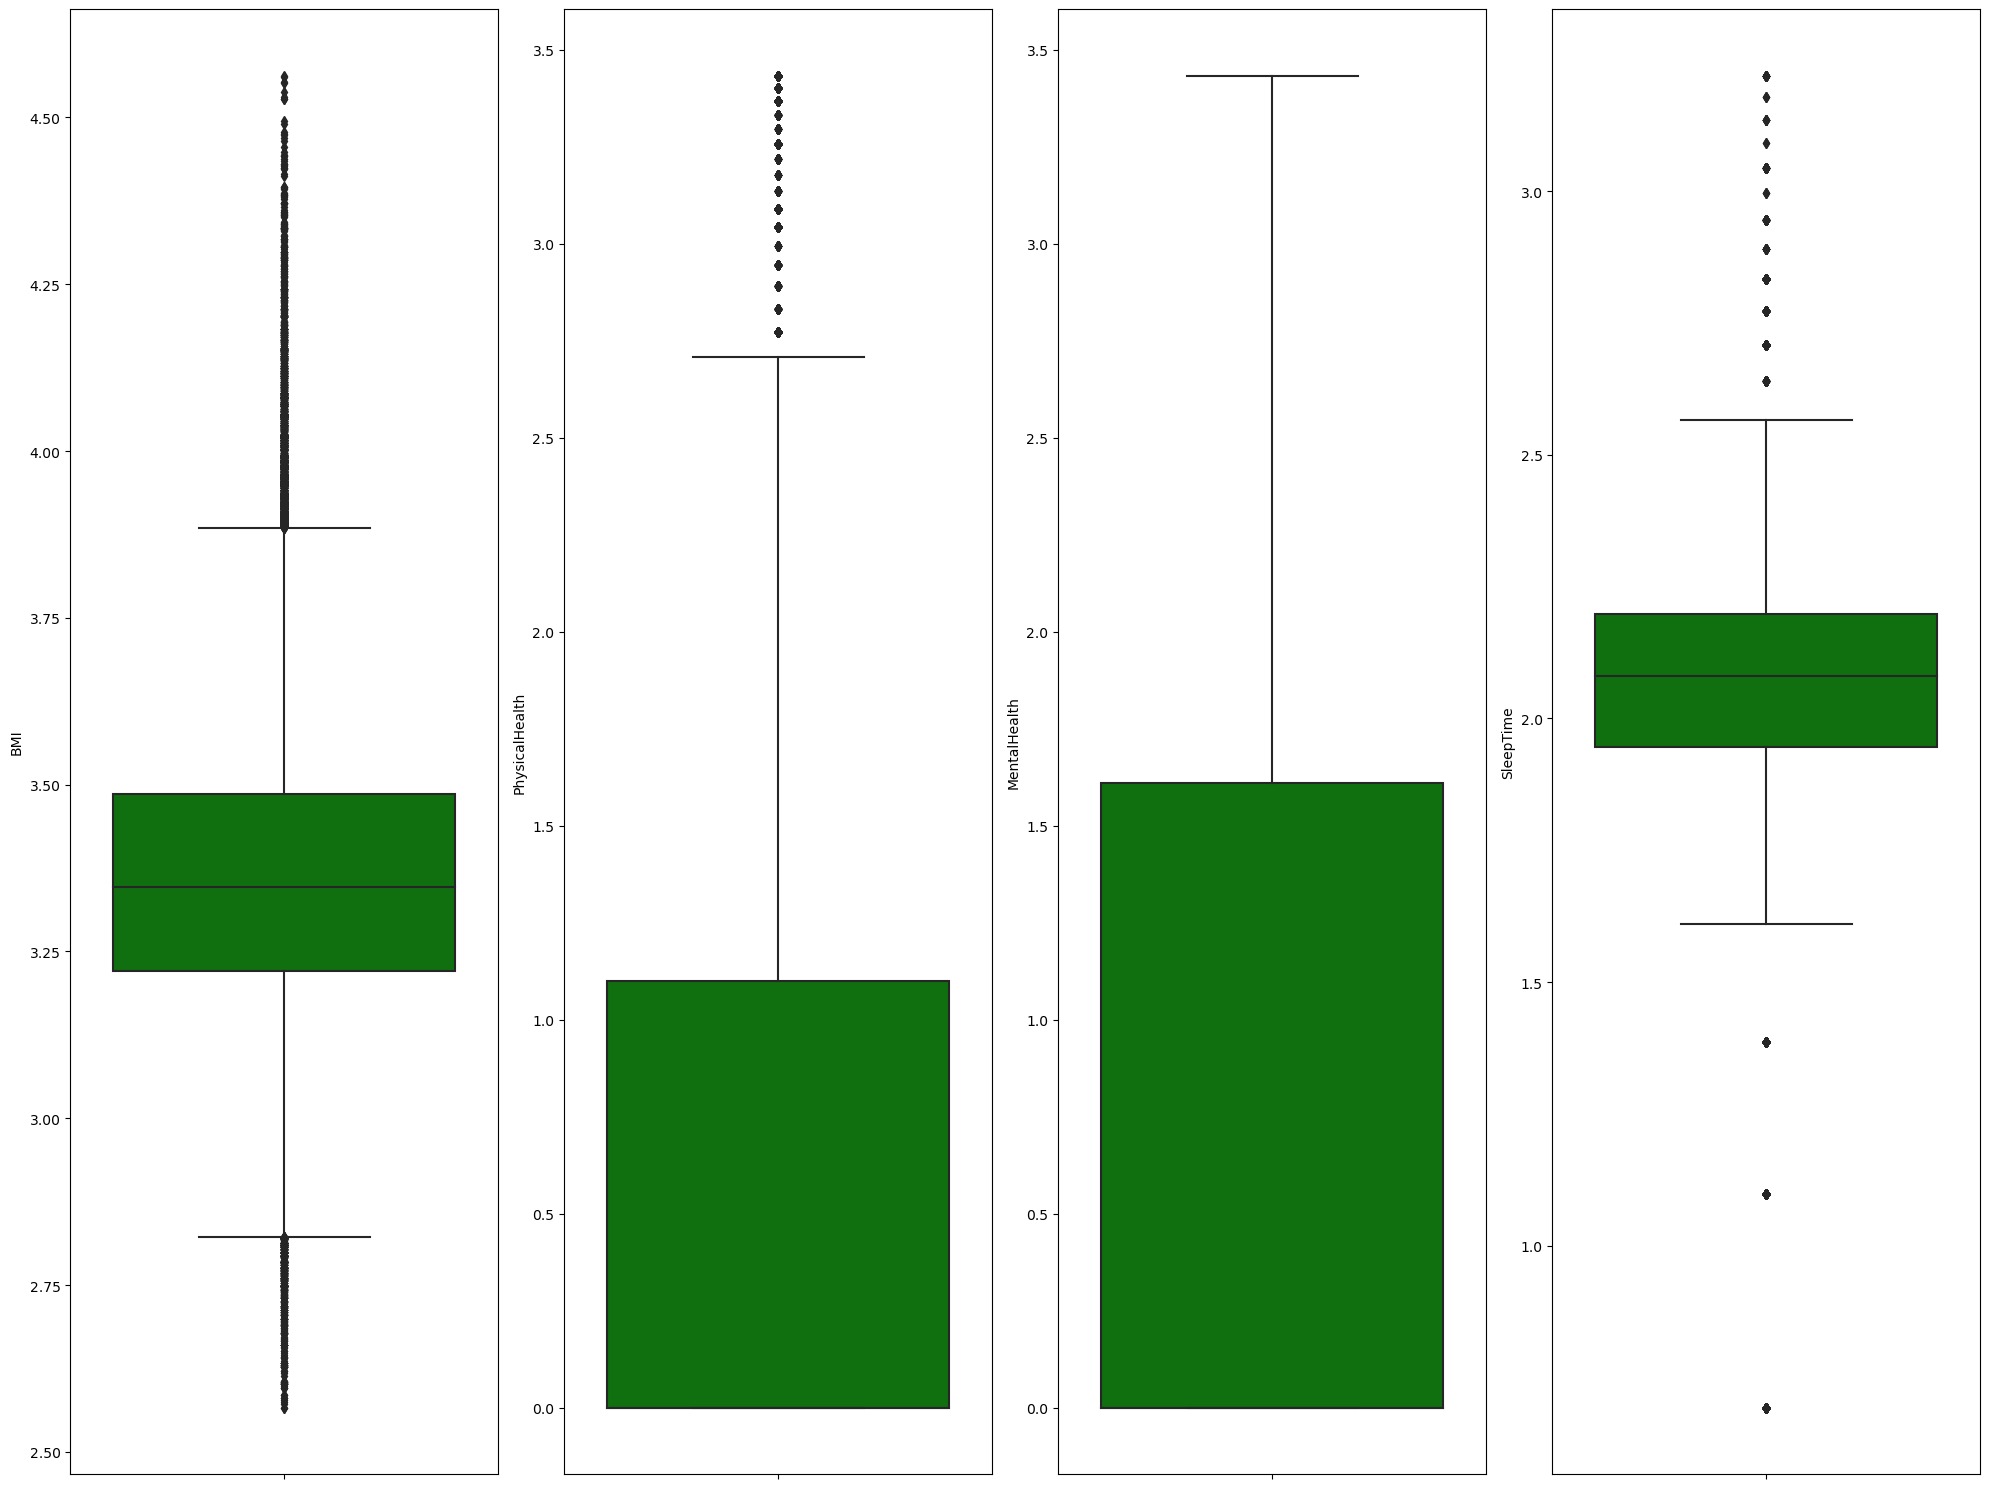

In [16]:
numsbin = ['BMI','PhysicalHealth', 'MentalHealth','SleepTime' ]

plt.figure(figsize=(20,15))
features = numsbin
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

nah, setelah outlier di handling terlihat lebih baik!

## FEATURE SCALLING & SMOTE

Karna data pada target kita imbalance, mari kita lakukan SMOTE agar data kita dapat imbalance!, scalling pada feature juga kita lakukan dikarenakan kita akan memakai salah satu interpolasi linear modelling (KNN)!

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan scaling pada fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menerapkan SMOTE untuk menangani ketidakseimbangan data pada data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

__MODELLING__

In [15]:
#RANDOM FOREST
rf_sm = RandomForestClassifier()
rf_sm.fit(X_train_smote, y_train_smote)
y_train_pred_sm_rf = rf_sm.predict(X_train_smote)
y_test_pred_sm_rf = rf_sm.predict(X_test_scaled)

#DECISION TREE
dt_sm = DecisionTreeClassifier()
dt_sm.fit(X_train_smote, y_train_smote)
y_train_pred_sm_dt = dt_sm.predict(X_train_smote)
y_test_pred_sm_dt = dt_sm.predict(X_test_scaled)

#XGBOOST
xgb_sm = XGBClassifier()
xgb_sm.fit(X_train_smote, y_train_smote)
y_train_pred_sm_xgb = xgb_sm.predict(X_train_smote)
y_test_pred_sm_xgb = xgb_sm.predict(X_test_scaled)

#KNN
knn_sm = KNeighborsClassifier()
knn_sm.fit(X_train_smote, y_train_smote)
y_train_pred_sm_knn = knn_sm.predict(X_train_smote)
y_test_pred_sm_knn = knn_sm.predict(X_test_scaled)

__CHECKING RESULTS__

In [16]:
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test):
    metrics = {
        'Train Accuracy': accuracy_score(y_true_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_true_test, y_pred_test),
        'Train Precision': precision_score(y_true_train, y_pred_train, average='weighted'),
        'Test Precision': precision_score(y_true_test, y_pred_test, average='weighted'),
        'Train Recall': recall_score(y_true_train, y_pred_train, average='weighted'),
        'Test Recall': recall_score(y_true_test, y_pred_test, average='weighted'),
        'Train F1 Score': f1_score(y_true_train, y_pred_train, average='weighted'),
        'Test F1 Score': f1_score(y_true_test, y_pred_test, average='weighted')
    }
    return metrics


# Evaluasi model Random Forest
rf_metrics = evaluate_model(y_train_smote, y_train_pred_sm_rf, y_test, y_test_pred_sm_rf)

# Evaluasi model Decision Tree
dt_metrics = evaluate_model(y_train_smote, y_train_pred_sm_dt, y_test, y_test_pred_sm_dt)

# Evaluasi model XGBoost
xgb_metrics = evaluate_model(y_train_smote, y_train_pred_sm_xgb, y_test, y_test_pred_sm_xgb)


# Evaluasi model KNN
knn_metrics = evaluate_model(y_train_smote, y_train_pred_sm_knn, y_test, y_test_pred_sm_knn)

# Membuat dataframe untuk perbandingan hasil
df_comparison = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'RF Train': [rf_metrics['Train Accuracy'], rf_metrics['Train Precision'], rf_metrics['Train Recall'], rf_metrics['Train F1 Score']],
    'RF Test': [rf_metrics['Test Accuracy'], rf_metrics['Test Precision'], rf_metrics['Test Recall'], rf_metrics['Test F1 Score']],
    'DT Train': [dt_metrics['Train Accuracy'], dt_metrics['Train Precision'], dt_metrics['Train Recall'], dt_metrics['Train F1 Score']],
    'DT Test': [dt_metrics['Test Accuracy'], dt_metrics['Test Precision'], dt_metrics['Test Recall'], dt_metrics['Test F1 Score']],
    'XGB Train': [xgb_metrics['Train Accuracy'], xgb_metrics['Train Precision'], xgb_metrics['Train Recall'], xgb_metrics['Train F1 Score']],
    'XGB Test': [xgb_metrics['Test Accuracy'], xgb_metrics['Test Precision'], xgb_metrics['Test Recall'], xgb_metrics['Test F1 Score']],
    'KNN Train': [knn_metrics['Train Accuracy'], knn_metrics['Train Precision'], knn_metrics['Train Recall'], knn_metrics['Train F1 Score']],
    'KNN Test': [knn_metrics['Test Accuracy'], knn_metrics['Test Precision'], knn_metrics['Test Recall'], knn_metrics['Test F1 Score']]
})

df_comparison

Metrics  RF Train   RF Test  DT Train   DT Test  XGB Train  XGB Test  \
0   Accuracy  0.996989  0.865720  0.997015  0.831251   0.905357  0.876674   
1  Precision  0.996990  0.860952  0.997028  0.859079   0.907696  0.869049   
2     Recall  0.996989  0.865720  0.997015  0.831251   0.905357  0.876674   
3   F1 Score  0.996989  0.863291  0.997014  0.844143   0.905221  0.872702   

   KNN Train  KNN Test  
0   0.902854  0.759744  
1   0.908915  0.873467  
2   0.902854  0.759744  
3   0.902493  0.803604

Setiap kolom terlihat mengalami overfitting, kecuali model XGB

### EVALUATION

__COFUSION MATRIX__

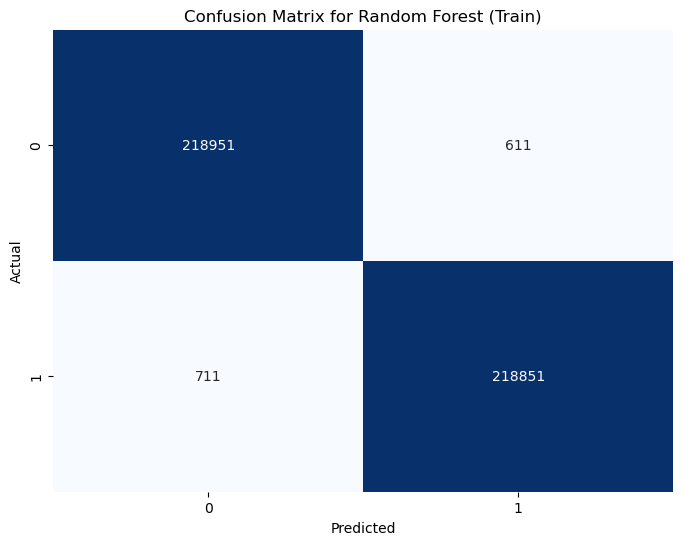

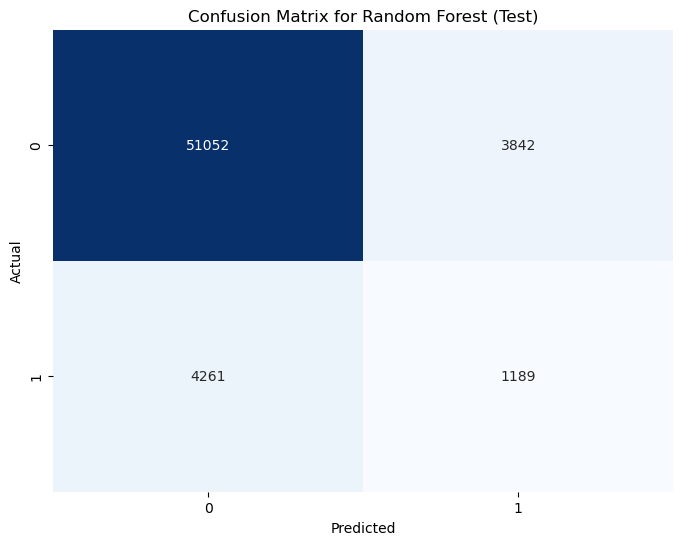

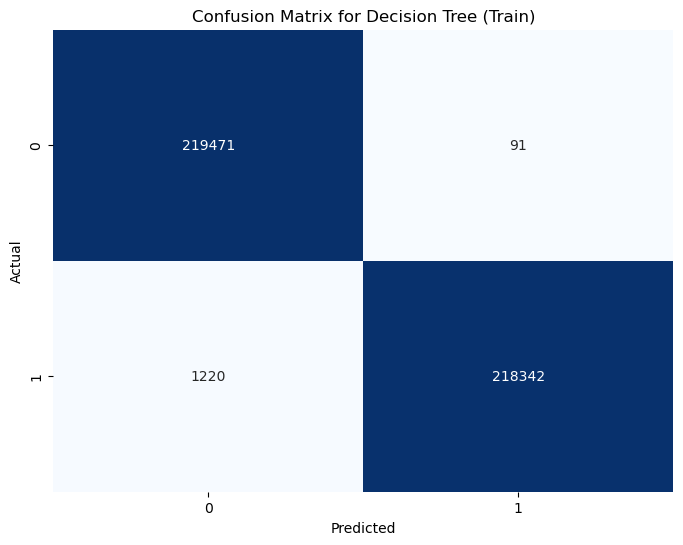

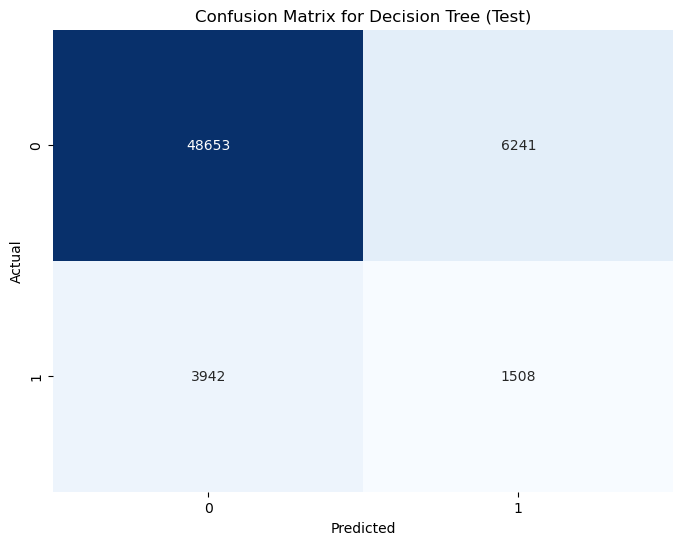

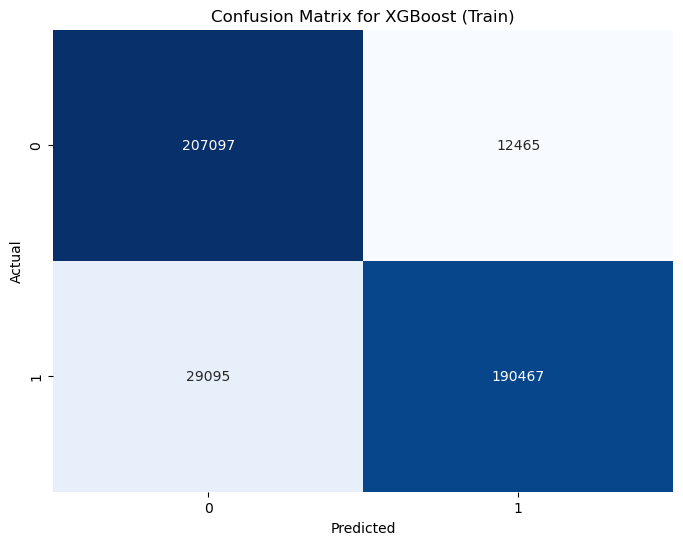

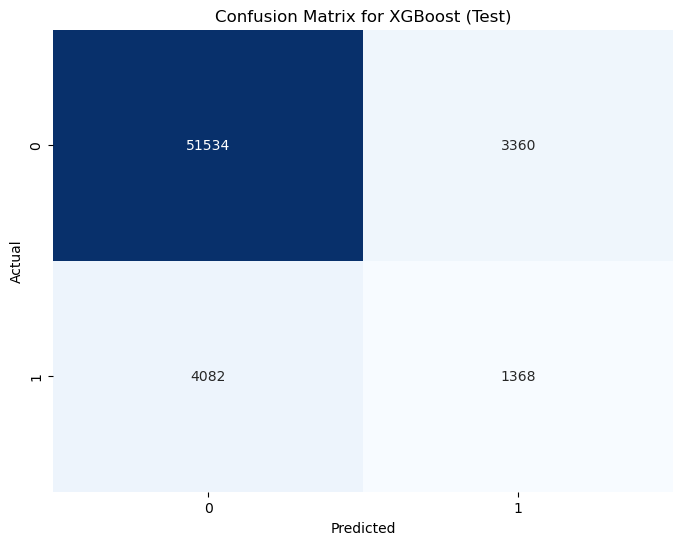

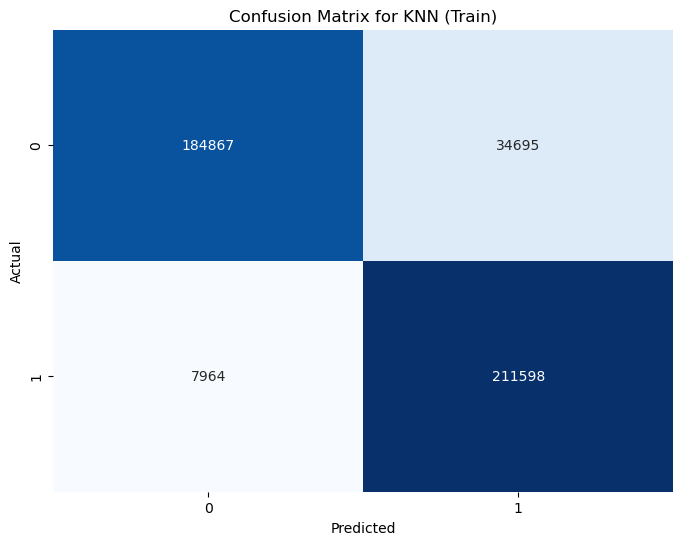

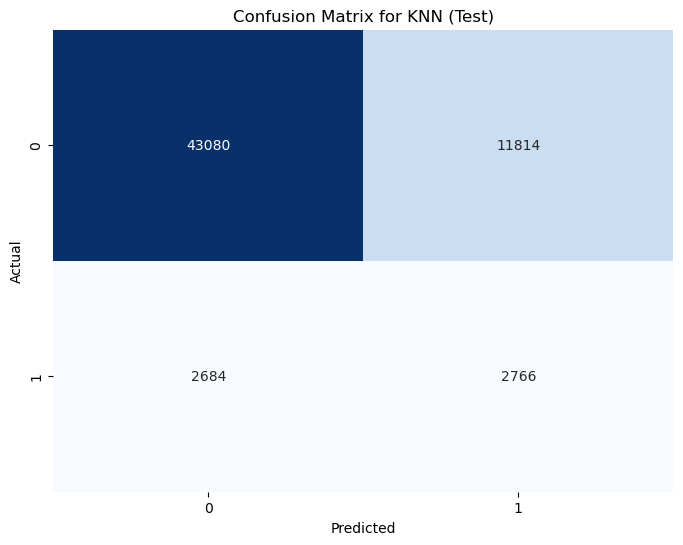

In [35]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_confusion_matrix

# Fungsi untuk membuat dan menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Confusion Matrix untuk Random Forest
plot_confusion_matrix(y_train_smote, y_train_pred_sm_rf, "Confusion Matrix for Random Forest (Train)")
plot_confusion_matrix(y_test, y_test_pred_sm_rf, "Confusion Matrix for Random Forest (Test)")

# Confusion Matrix untuk Decision Tree
plot_confusion_matrix(y_train_smote, y_train_pred_sm_dt, "Confusion Matrix for Decision Tree (Train)")
plot_confusion_matrix(y_test, y_test_pred_sm_dt, "Confusion Matrix for Decision Tree (Test)")

# Confusion Matrix untuk XGBoost
plot_confusion_matrix(y_train_smote, y_train_pred_sm_xgb, "Confusion Matrix for XGBoost (Train)")
plot_confusion_matrix(y_test, y_test_pred_sm_xgb, "Confusion Matrix for XGBoost (Test)")

# Confusion Matrix untuk KNN
plot_confusion_matrix(y_train_smote, y_train_pred_sm_knn, "Confusion Matrix for KNN (Train)")
plot_confusion_matrix(y_test, y_test_pred_sm_knn, "Confusion Matrix for KNN (Test)")

__CHECKING ROC CURVES__

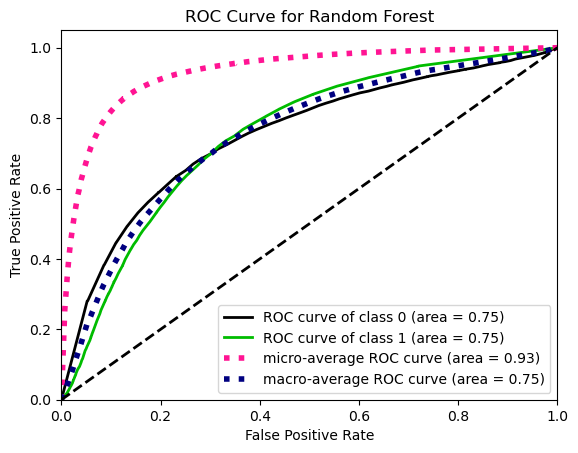

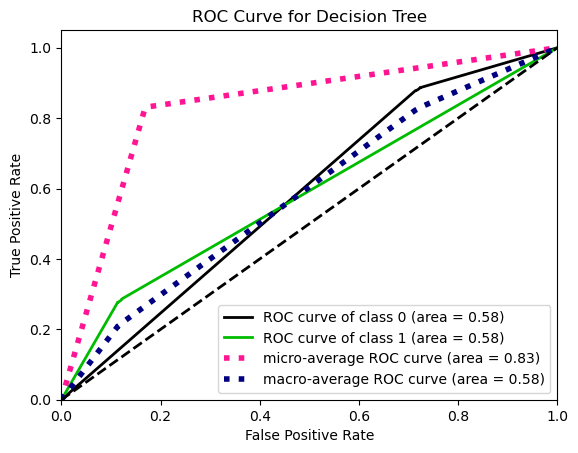

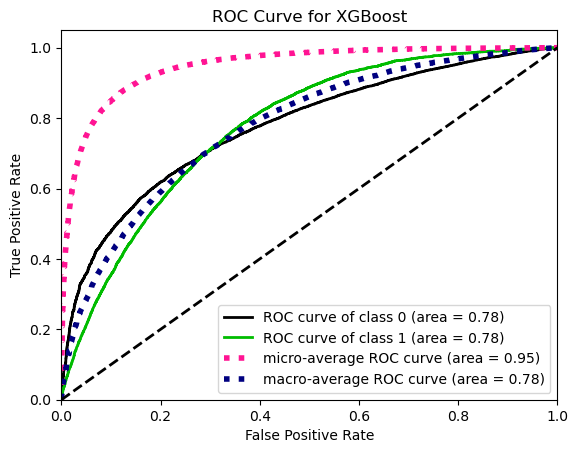

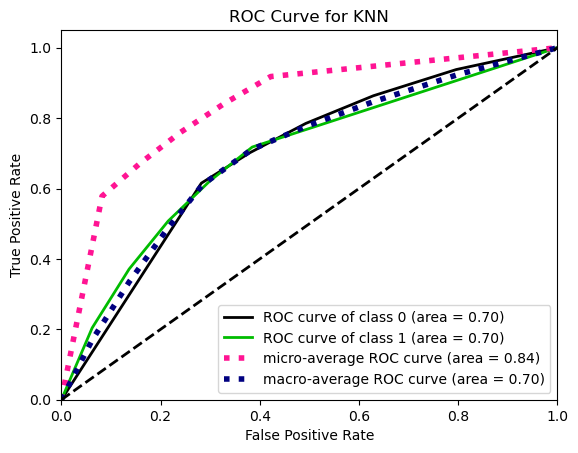

In [39]:
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC Curve untuk Random Forest
skplt.metrics.plot_roc_curve(y_test, rf_sm.predict_proba(X_test_scaled))
plt.title('ROC Curve for Random Forest')
plt.show()

# Plot ROC Curve untuk Decision Tree
skplt.metrics.plot_roc_curve(y_test, dt_sm.predict_proba(X_test_scaled))
plt.title('ROC Curve for Decision Tree')
plt.show()

# Plot ROC Curve untuk XGBoost
skplt.metrics.plot_roc_curve(y_test, xgb_sm.predict_proba(X_test_scaled))
plt.title('ROC Curve for XGBoost')
plt.show()

# Plot ROC Curve untuk KNN
skplt.metrics.plot_roc_curve(y_test, knn_sm.predict_proba(X_test_scaled))
plt.title('ROC Curve for KNN')
plt.show()

### FEATURE IMPORTANCE

In [16]:
import dalex as dx

# Mengonversi array NumPy X_train_smote menjadi DataFrame
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)

# Inisialisasi Explainer untuk semua model
clasf_rf_exp = dx.Explainer(rf_sm, X_train_smote_df, y_train_smote, label="Random Forest Interpretation")
clasf_dt_exp = dx.Explainer(dt_sm, X_train_smote_df, y_train_smote, label="Decision Tree Interpretation")
clasf_xgb_exp = dx.Explainer(xgb_sm, X_train_smote_df, y_train_smote, label="XGBOOST Interpretation")
clasf_knn_exp = dx.Explainer(knn_sm, X_train_smote_df, y_train_smote, label="KNN Interpretation")

Preparation of a new explainer is initiated

  -> data              : 439124 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 439124 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x00000229061584A0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.501, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.914, mean = -0.000627, max = 0.824
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 439124 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.

In [17]:
# Plot model parts for Random Forest
clasf_rf_exp.model_parts().plot()

# Plot model parts for Decision Tree
clasf_dt_exp.model_parts().plot()

# Plot model parts for XGBoost
clasf_xgb_exp.model_parts().plot()

# Plot model parts for K-Nearest Neighbors
clasf_knn_exp.model_parts().plot()

# PREPROCESSING WITH PCA

In [17]:
feats = ['BMI','Smoking','AlcoholDrinking','Stroke', 'PhysicalHealth','MentalHealth','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','SleepTime', 'Asthma','KidneyDisease','SkinCancer']
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

__FEATURE SCALLING__

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [19]:
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

BMI   Smoking  AlcoholDrinking    Stroke  PhysicalHealth  \
0 -2.385308  1.169689        -0.277556 -0.204083        0.669095   
1 -1.452128 -0.854928        -0.277556  4.899969       -0.583700   
2 -0.209847  1.169689        -0.277556 -0.204083        2.167637   
3 -0.644996 -0.854928        -0.277556 -0.204083       -0.583700   
4 -0.742016 -0.854928        -0.277556 -0.204083        2.459328   

   MentalHealth  DiffWalking       Sex  AgeCategory     Race  Diabetic  \
0      2.283466    -0.415144 -0.943195     0.609965  0.56949 -2.162389   
1     -0.686140    -0.415144 -0.943195    -0.014433  0.56949  0.444274   
2      2.283466    -0.415144  1.060226     1.234362  0.56949 -2.162389   
3     -0.686140    -0.415144 -0.943195    -0.638830  0.56949  0.444274   
4     -0.686140     2.408801 -0.943195    -0.638830  0.56949  0.444274   

   PhysicalActivity  GenHealth  SleepTime    Asthma  KidneyDisease  SkinCancer  
0          0.556298   0.485003  -1.459106  2.464567      -0.201532    3.049643  
1          0.556298   0.485003   0.035579 -0.405751      -0.201532   -0.327907  
2          0.556298   1.438429   0.647534  2.464567      -0.201532   -0.327907  
3         -1.797598  -0.468423  -0.658199 -0.405751      -0.201532    3.049643  
4          0.556298   0.485003   0.647534 -0.405751      -0.201532   -0.327907

__PCA for getting Principle Components__

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=17)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13', 'pc14', 'pc15','pc16','pc17'])
pdf['HeartDisease'] = y.values
pdf.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  1.697371  0.085760  2.641524 -1.691314  2.364557  0.168780  0.544596   
1 -0.175902 -0.817301  0.414266 -1.685376 -1.574022  2.869332  1.062403   
2  2.779552  0.449088  1.064163  0.257481  1.644317 -0.502949  1.115292   
3 -0.560817 -1.002588  0.482886 -1.418379  0.256607 -0.097777 -1.250815   
4  1.371960  0.301582  0.406499 -1.588454 -0.863427  0.159170 -0.972073   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.211411  1.431039  1.249192 -0.213506 -2.009617  2.409144 -2.187539   
1 -1.797799  2.397864 -1.405521  0.389463  1.304358 -0.456350 -0.097745   
2 -0.865234 -0.556524 -1.226619 -1.609920 -2.133301  0.336887 -1.562314   
3  0.165186  0.036335  2.099031  2.073343  1.044629  1.075446 -0.747176   
4 -0.299344 -0.848667 -0.472149 -0.021268 -0.602555 -1.347517  0.297350   

       pc15      pc16      pc17  HeartDisease  
0  0.299210 -0.544003  0.081625             0  
1 -1.172281 -0.465008  0.106913             0  
2  0.914399 -1.185570 -0.674858             0  
3 -0.792970 -0.228094 -0.183278             0  
4 -0.330492  2.570817 -0.649239             0

__SKREE PLOT__

In [21]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [2.45443275 1.4626738  1.25749747 1.13539077 1.0093263  0.99126873
 0.95210564 0.91930821 0.90851385 0.86622944 0.85032928 0.82693633
 0.79263933 0.72160155 0.6643963  0.65633629 0.53107029]
Explained variance ratio: [0.14437792 0.08603935 0.07397019 0.06678747 0.05937194 0.05830973
 0.05600603 0.05407677 0.05344181 0.0509545  0.0500192  0.04864315
 0.04662569 0.04244701 0.03908201 0.03860789 0.03123933]


<BarContainer object of 17 artists>

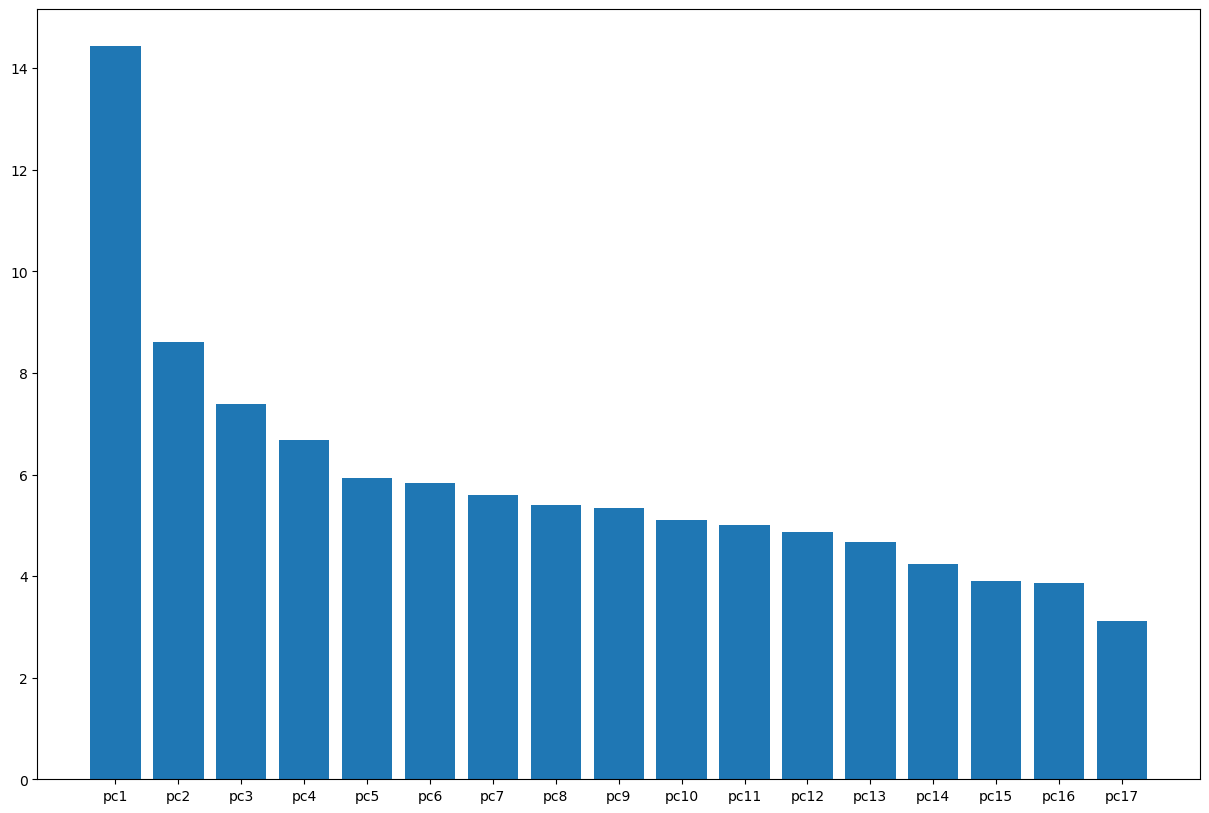

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13', 'pc14', 'pc15','pc16','pc17'], pca.explained_variance_ratio_ * 100)

In [23]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 14.43779187,  23.04172688,  30.43874628,  37.1174934 ,
        43.05468728,  48.88566049,  54.48626334,  59.89394078,
        65.23812219,  70.33357257,  75.33549295,  80.19980819,
        84.86237706,  89.10707799,  93.01527855,  96.87606747,
       100.        ])

__FEATURE REDUCTION__

In [24]:
pca = PCA(n_components=12)
pca.fit(X_std)
pcs = pca.fit_transform(X_std)

# Buat DataFrame dari hasil PCA
X_std_pca = pd.DataFrame(data=pcs, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12'])

# Tambahkan kolom target
X_std_pca['HeartDisease'] = y.values

X_std_pca.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  1.697371  0.085760  2.641524 -1.691314  2.364557  0.168780  0.544596   
1 -0.175902 -0.817301  0.414266 -1.685376 -1.574022  2.869332  1.062403   
2  2.779552  0.449088  1.064163  0.257481  1.644317 -0.502949  1.115292   
3 -0.560817 -1.002588  0.482886 -1.418379  0.256607 -0.097777 -1.250815   
4  1.371960  0.301582  0.406499 -1.588454 -0.863427  0.159170 -0.972073   

        pc8       pc9      pc10      pc11      pc12  HeartDisease  
0  0.211411  1.431039  1.249192 -0.213506 -2.009617             0  
1 -1.797799  2.397864 -1.405521  0.389463  1.304358             0  
2 -0.865234 -0.556524 -1.226619 -1.609920 -2.133301             0  
3  0.165186  0.036335  2.099031  2.073343  1.044629             0  
4 -0.299344 -0.848667 -0.472149 -0.021268 -0.602555             0

__SPLITTING DATA__

In [25]:
X_pca = X_std_pca.drop('HeartDisease', axis=1)
y_pca = X_std_pca['HeartDisease']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca,
                                                                    test_size=0.2,
                                                                    random_state=42)

__BALANCING DATA WITH SMOTE__

In [26]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Aplikasi SMOTE hanya pada data training
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train_pca)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# RANDOM FOREST
pca_rf = RandomForestClassifier()
pca_rf.fit(X_train_smote, y_train_smote)
y_train_pred_pca_rf = pca_rf.predict(X_train_smote)
y_test_pred_pca_rf = pca_rf.predict(X_test_pca)

# DECISION TREE
pca_dt = DecisionTreeClassifier()
pca_dt.fit(X_train_smote, y_train_smote)
y_train_pred_pca_dt = pca_dt.predict(X_train_smote)
y_test_pred_pca_dt = pca_dt.predict(X_test_pca)

# XGBOOST
pca_xgb = XGBClassifier()
pca_xgb.fit(X_train_smote, y_train_smote)
y_train_pred_pca_xgb = pca_xgb.predict(X_train_smote)
y_test_pred_pca_xgb = pca_xgb.predict(X_test_pca)

# KNN
pca_knn = KNeighborsClassifier()
pca_knn.fit(X_train_smote, y_train_smote)
y_train_pred_pca_knn = pca_knn.predict(X_train_smote)
y_test_pred_pca_knn = pca_knn.predict(X_test_pca)

__CHECKING RESULTS__

In [28]:
# Metrik evaluasi untuk setiap model
metrics_data = {
    "Model": ["Random Forest (Train)", "Random Forest (Test)", 
              "Decision Tree (Train)", "Decision Tree (Test)",
              "XGBoost (Train)", "XGBoost (Test)",
              "KNN (Train)", "KNN (Test)"],
    "Accuracy": [accuracy_score(y_train_smote, y_train_pred_pca_rf),
                 accuracy_score(y_test_pca, y_test_pred_pca_rf),
                 accuracy_score(y_train_smote, y_train_pred_pca_dt),
                 accuracy_score(y_test_pca, y_test_pred_pca_dt),
                 accuracy_score(y_train_smote, y_train_pred_pca_xgb),
                 accuracy_score(y_test_pca, y_test_pred_pca_xgb),
                 accuracy_score(y_train_smote, y_train_pred_pca_knn),
                 accuracy_score(y_test_pca, y_test_pred_pca_knn)],
    "Precision": [precision_score(y_train_smote, y_train_pred_pca_rf, average='weighted'),
                  precision_score(y_test_pca, y_test_pred_pca_rf, average='weighted'),
                  precision_score(y_train_smote, y_train_pred_pca_dt, average='weighted'),
                  precision_score(y_test_pca, y_test_pred_pca_dt, average='weighted'),
                  precision_score(y_train_smote, y_train_pred_pca_xgb, average='weighted'),
                  precision_score(y_test_pca, y_test_pred_pca_xgb, average='weighted'),
                  precision_score(y_train_smote, y_train_pred_pca_knn, average='weighted'),
                  precision_score(y_test_pca, y_test_pred_pca_knn, average='weighted')],
    "Recall": [recall_score(y_train_smote, y_train_pred_pca_rf, average='weighted'),
               recall_score(y_test_pca, y_test_pred_pca_rf, average='weighted'),
               recall_score(y_train_smote, y_train_pred_pca_dt, average='weighted'),
               recall_score(y_test_pca, y_test_pred_pca_dt, average='weighted'),
               recall_score(y_train_smote, y_train_pred_pca_xgb, average='weighted'),
               recall_score(y_test_pca, y_test_pred_pca_xgb, average='weighted'),
               recall_score(y_train_smote, y_train_pred_pca_knn, average='weighted'),
               recall_score(y_test_pca, y_test_pred_pca_knn, average='weighted')],
    "F1 Score": [f1_score(y_train_smote, y_train_pred_pca_rf, average='weighted'),
                 f1_score(y_test_pca, y_test_pred_pca_rf, average='weighted'),
                 f1_score(y_train_smote, y_train_pred_pca_dt, average='weighted'),
                 f1_score(y_test_pca, y_test_pred_pca_dt, average='weighted'),
                 f1_score(y_train_smote, y_train_pred_pca_xgb, average='weighted'),
                 f1_score(y_test_pca, y_test_pred_pca_xgb, average='weighted'),
                 f1_score(y_train_smote, y_train_pred_pca_knn, average='weighted'),
                 f1_score(y_test_pca, y_test_pred_pca_knn, average='weighted')]
}

# Buat dataframe dari dictionary
metrics_df = pd.DataFrame(metrics_data)

# Tampilkan dataframe
metrics_df

Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Train)  0.996983   0.996983  0.996983  0.996983
1   Random Forest (Test)  0.825699   0.870983  0.825699  0.845336
2  Decision Tree (Train)  0.997015   0.997028  0.997015  0.997014
3   Decision Tree (Test)  0.780972   0.860724  0.780972  0.814549
4        XGBoost (Train)  0.776459   0.777396  0.776459  0.776271
5         XGBoost (Test)  0.729236   0.890398  0.729236  0.784554
6            KNN (Train)  0.902977   0.909370  0.902977  0.902597
7             KNN (Test)  0.756695   0.872588  0.756695  0.801390

Terlihat bahwa setelah melakukan PCA accuracy makin menurun pada testing data dan training data dan beberapa model mengalami overfit.

## HYPERPARAMETER TUNING + SMOTE

Try Hyperparameter tuning to get the best model!

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier

# Split data
X = df.drop(columns='HeartDisease').to_numpy()
y = df['HeartDisease'].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Menerapkan SMOTE untuk menangani ketidakseimbangan data pada data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

__BEST MODEL (XGBOOST)__

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan model XGBoost
xgb_hyp = XGBClassifier()

# Definisikan hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4]
}

# Inisialisasi Randomized Search CV dengan skor F1
random_search = RandomizedSearchCV(estimator=xgb_hyp, param_distributions=param_grid, n_iter=100, 
                                   scoring='f1', cv=5, verbose=2, random_state=42, n_jobs=-1)

# Melakukan Randomized Search CV pada data latih setelah dilakukan SMOTE
random_search.fit(X_train_smote, y_train_smote)

# Cetak parameter terbaik
print("Parameter Terbaik:", random_search.best_params_)

# Prediksi pada data uji
y_pred_hyp = random_search.predict(X_test)

# Evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hyp))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Parameter Terbaik: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.9}

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     58367
           1       0.34      0.16      0.21      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.56      0.58     63959
weighted avg       0.87      0.90      0.88     63959

